# 1. Data cleaning, preparation and exploration

## 1.1. Packages

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Avoid scientific notation in float values
pd.options.display.float_format = '{:.2f}'.format

# Ignore warnings
import warnings
warnings.simplefilter(action = "ignore")

# Show all rows and columns in the outputs
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Switch off the warning about setting with copy
pd.set_option('mode.chained_assignment', None)

# Increase width of column
pd.set_option('display.max_colwidth', None)

## 1.2. Import datasets

### a) Twitter variables and sentiment analysis

In [2]:
df_twitter = pd.read_csv("../data/df_monthly_ml.csv", parse_dates = [0])
df_twitter[['Date']] = df_twitter[['year_month']]
df_twitter = df_twitter.drop(['year_month'], axis = 1)
df_twitter.head()

sentiment_BR  total_BR  sentiment_BRG1665  sentiment_BRG1666  \
0         -0.11      7753              -0.03              -0.01   
1         -0.14      1099               0.00              -0.14   
2         -0.11       930               0.00               0.00   
3         -0.13     17898              -0.06              -0.03   
4         -0.19     12278              -0.14              -0.07   

   sentiment_BRG1667  sentiment_BRG1668  sentiment_BRG1669  sentiment_BRG1670  \
0              -0.06              -0.12              -0.09              -0.06   
1               0.00              -0.07              -0.09              -0.17   
2               0.00              -0.05              -0.09              -0.07   
3              -0.07              -0.10              -0.07              -0.06   
4              -0.11              -0.08              -0.13              -0.09   

   sentiment_BRG1671  sentiment_BRG1672  sentiment_BRG1673  sentiment_BRG1674  \
0              -0.02              -0.15              -0.08              -0.09   
1              -0.03              -0.05              -0.10               0.00   
2              -0.06              -0.09               0.00               0.00   
3              -0.11              -0.12              -0.08              -0.08   
4              -0.13              -0.18              -0.15              -0.15   

   sentiment_BRG1675  sentiment_BRG1676  sentiment_BRG1677  sentiment_BRG1678  \
0               0.00              -0.09              -0.11              -0.09   
1              -0.17              -0.12              -0.15               0.20   
2              -0.12              -0.23              -0.11               0.00   
3              -0.12              -0.11              -0.10              -0.14   
4              -0.08              -0.11              -0.17              -0.22   

   sentiment_BRG1679  sentiment_BRG1680  sentiment_BRG1681  sentiment_BRG1682  \
0              -0.04              -0.14              -0.04               0.00   
1              -0.07              -0.11              -0.11               0.00   
2              -0.06              -0.18              -0.01               0.00   
3              -0.06              -0.15              -0.06               0.00   
4              -0.09              -0.24              -0.08              -0.05   

   sentiment_BRG1683  sentiment_BRG1685  sentiment_BRG1686  sentiment_BRG1687  \
0              -0.14              -0.08               0.00              -0.23   
1              -0.40              -0.12               0.00               0.00   
2               0.00              -0.22               0.00               0.00   
3              -0.15              -0.23              -0.02              -0.04   
4              -0.21              -0.26               0.00              -0.15   

   sentiment_BRG1688  sentiment_BRG1689  sentiment_BRG1690  sentiment_BRG1691  \
0              -0.13              -0.16              -0.04              -0.27   
1              -0.24              -0.22               0.00               0.00   
2              -0.04              -0.16               0.00               0.00   
3              -0.16              -0.17              -0.03              -0.05   
4              -0.20              -0.27              -0.03              -0.06   

   total_BRG1665  total_BRG1666  total_BRG1667  total_BRG1668  total_BRG1669  \
0             39             97             49            170            412   
1              7             14              4             29             66   
2              1              7              3             20             66   
3             81            326            116            407           1071   
4             66             91             79            162            505   

   total_BRG1670  total_BRG1671  total_BRG1672  total_BRG1673  total_BRG1674  \
0            280            240            116            161            247   
1             30             36      

In [3]:
df_twitter.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 107 columns):
 #   Column                                                                      Dtype              
---  ------                                                                      -----              
 0   sentiment_BR                                                                float64            
 1   total_BR                                                                    int64              
 2   sentiment_BRG1665                                                           float64            
 3   sentiment_BRG1666                                                           float64            
 4   sentiment_BRG1667                                                           float64            
 5   sentiment_BRG1668                                                           float64            
 6   sentiment_BRG1669                                                           float64

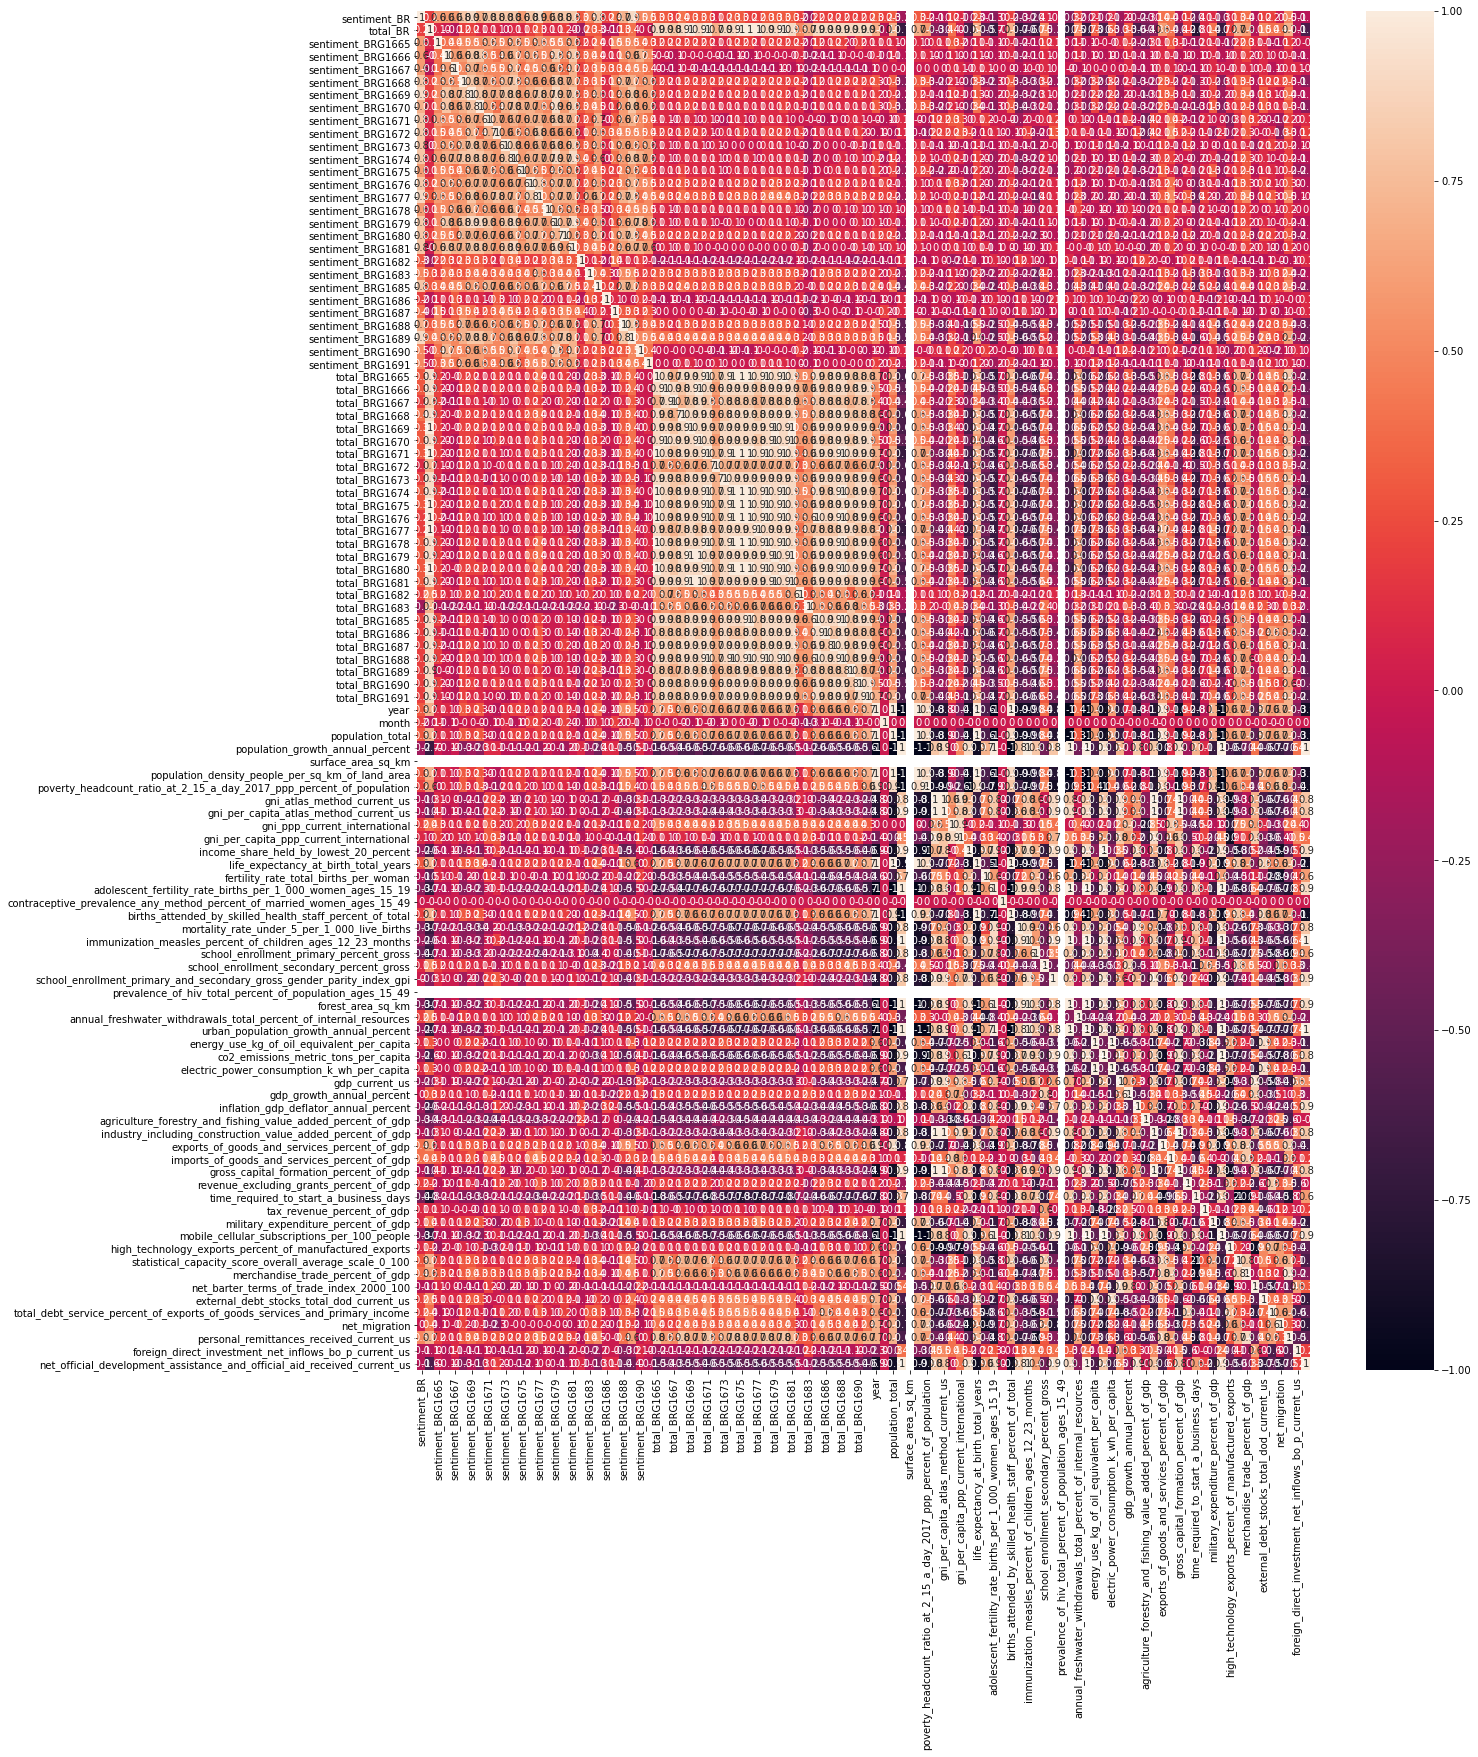

In [4]:
# Heatmap with correlation coefficients between all variables
corr_matrix = df_twitter.corr().round(1)
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize']= 20,25
sns.heatmap(corr_matrix, annot = True)
plt.xticks(rotation = 90)
plt.show()

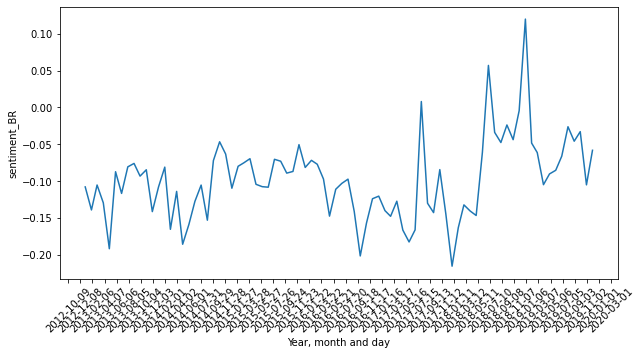

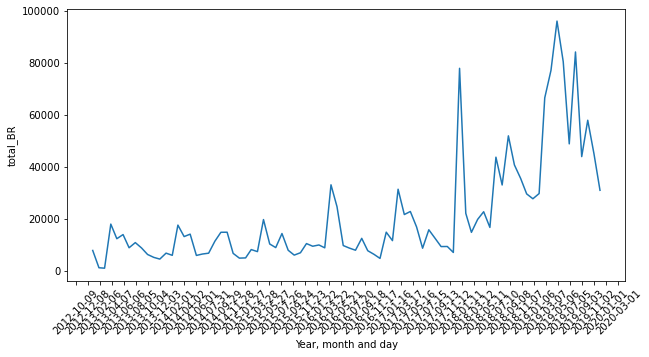

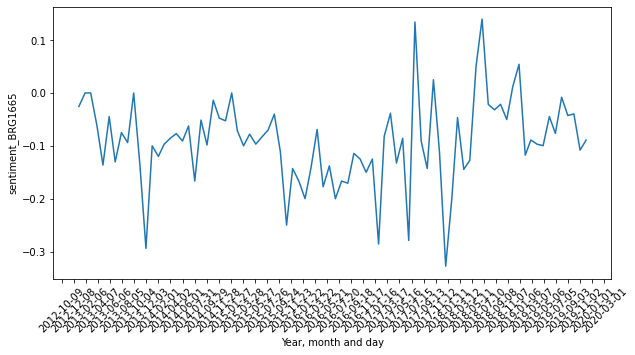

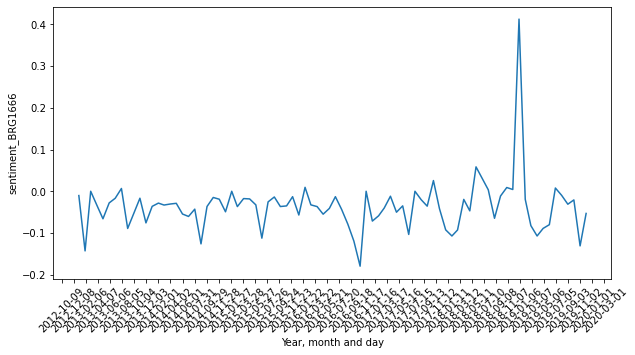

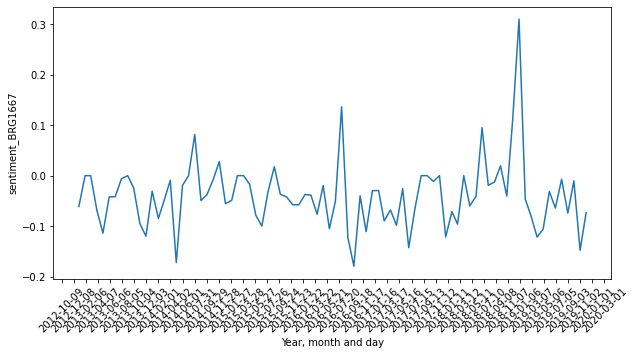

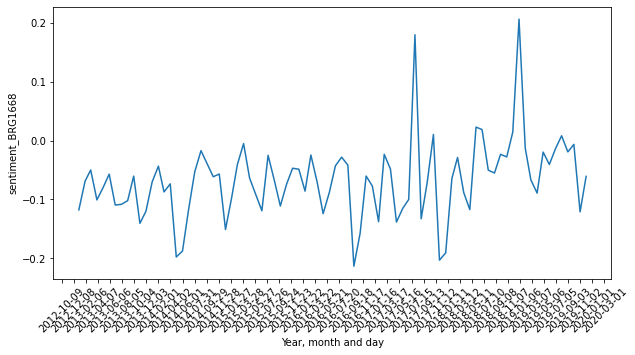

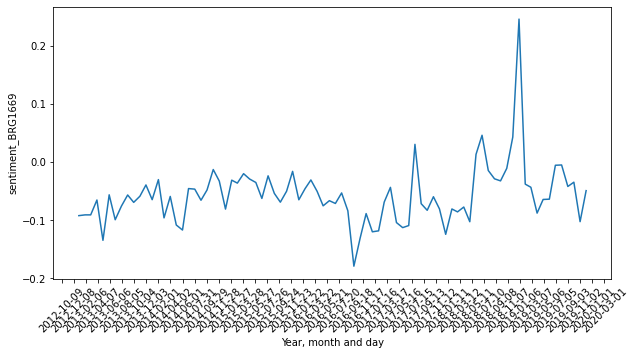

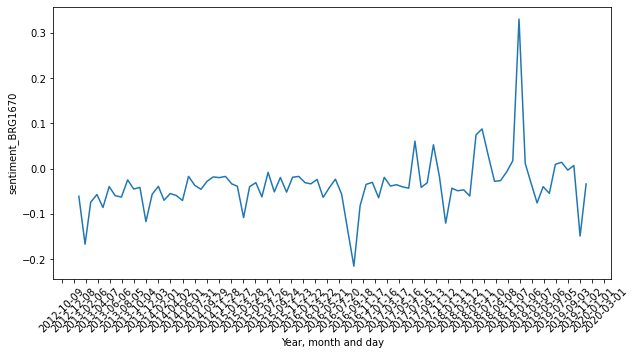

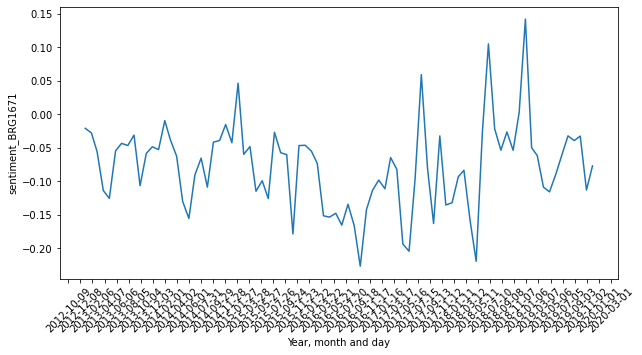

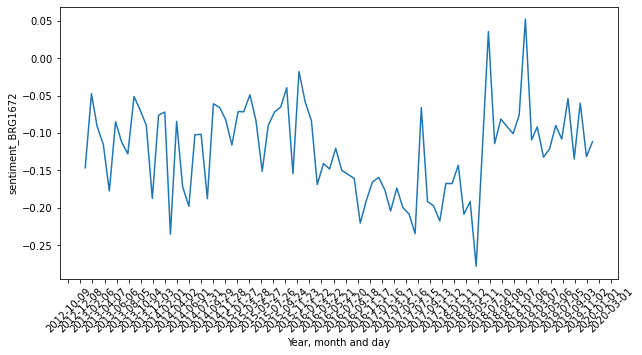

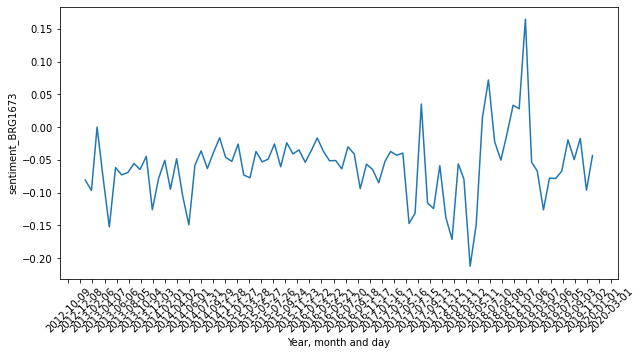

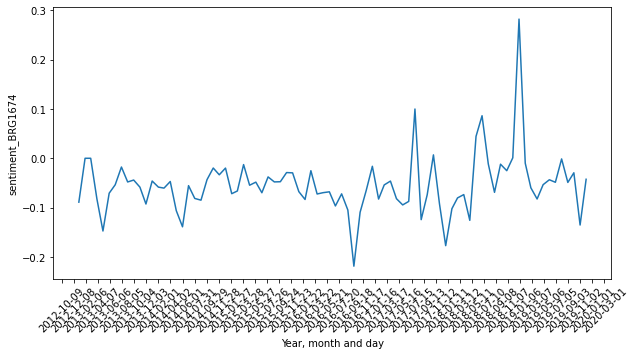

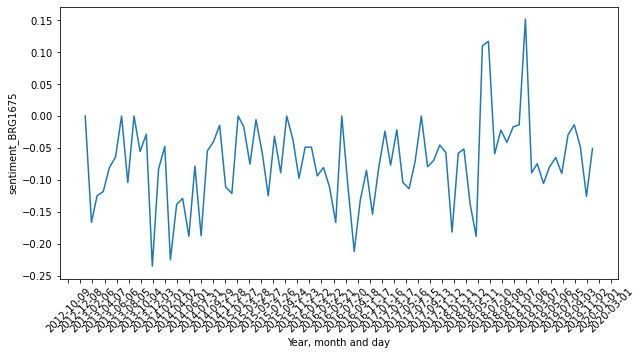

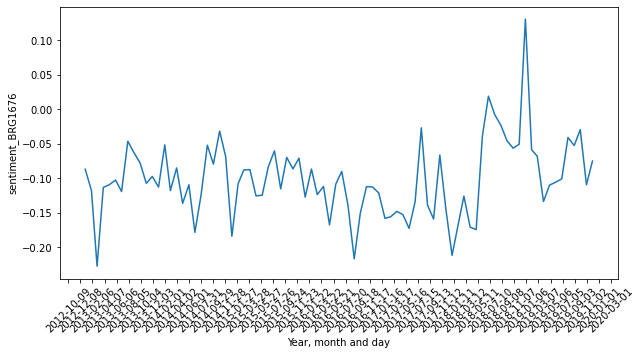

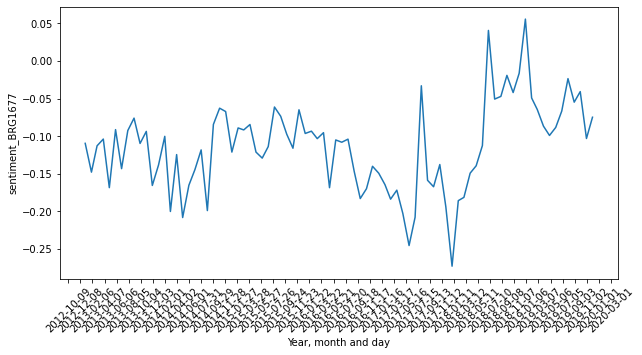

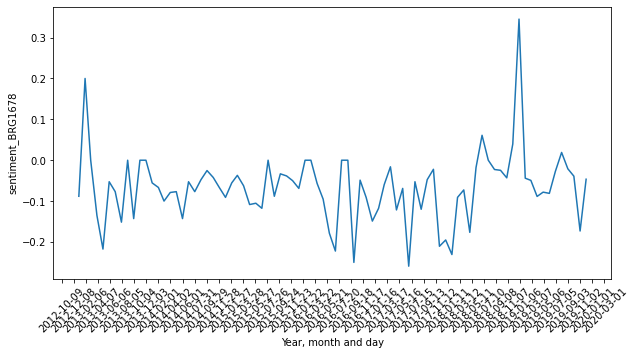

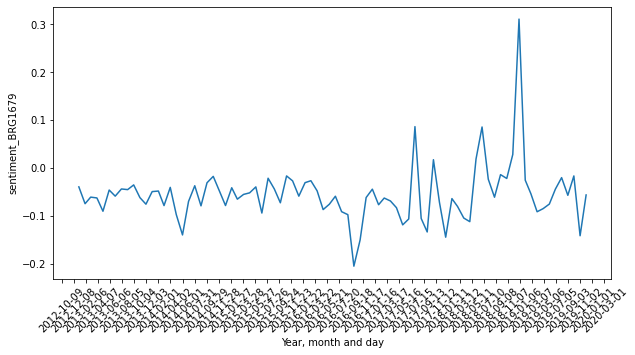

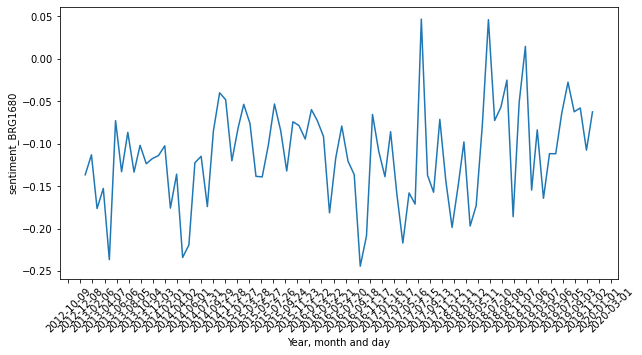

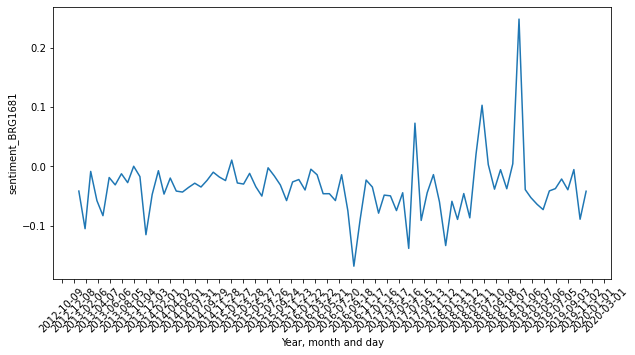

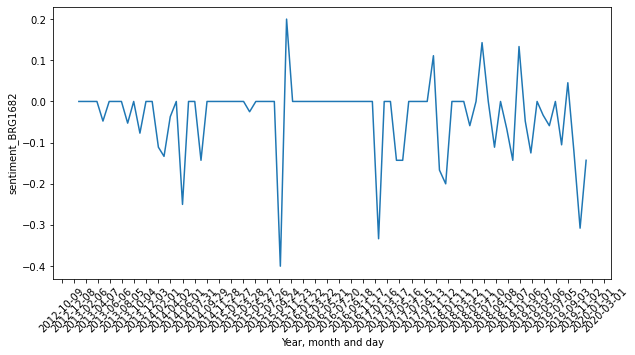

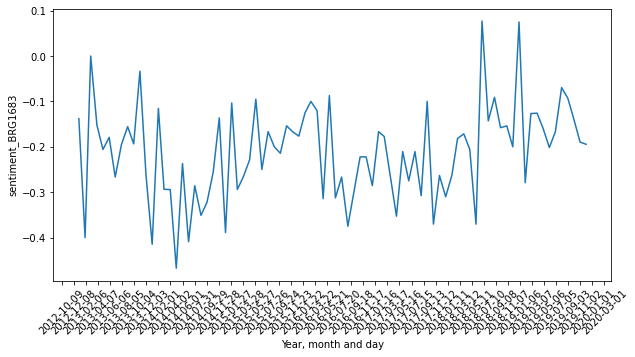

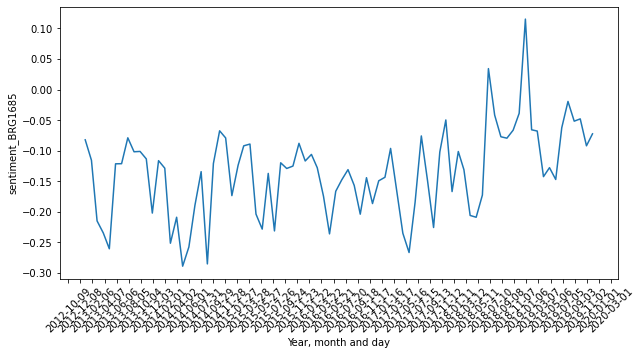

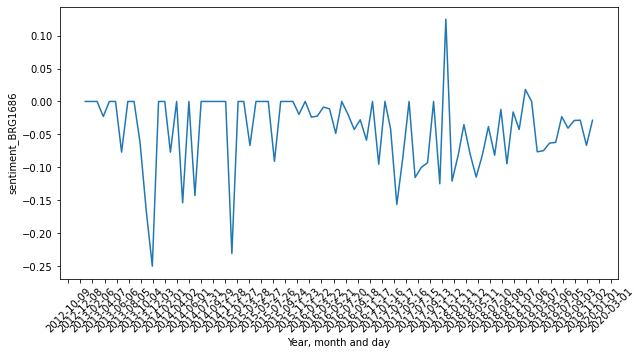

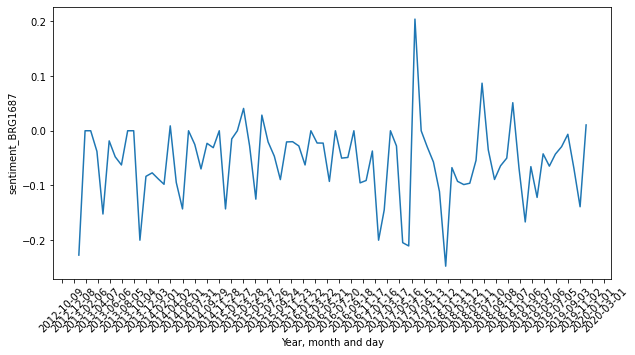

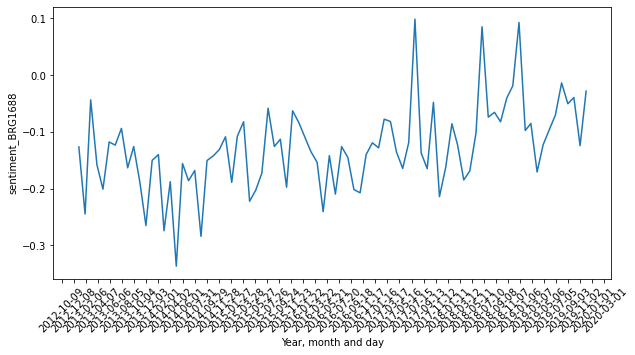

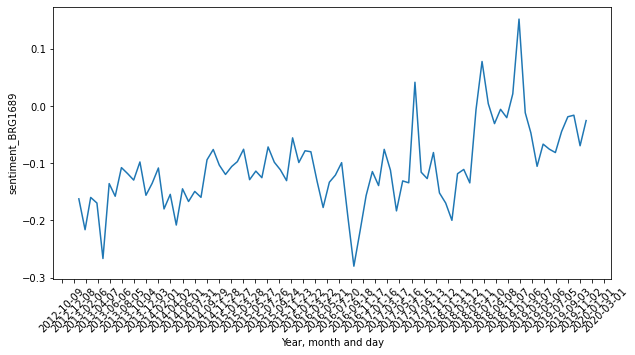

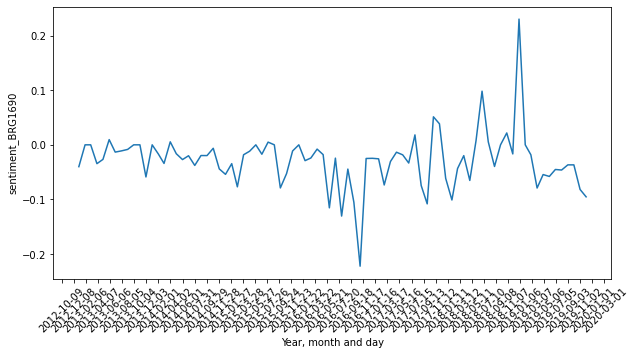

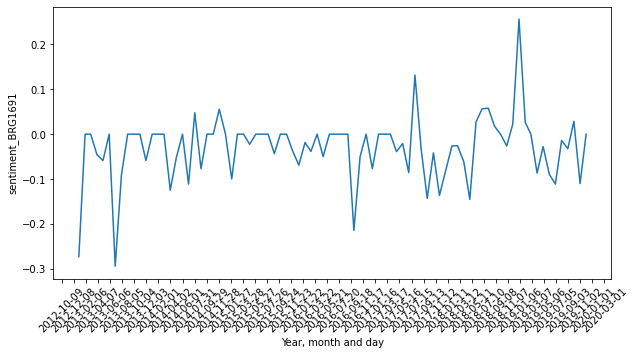

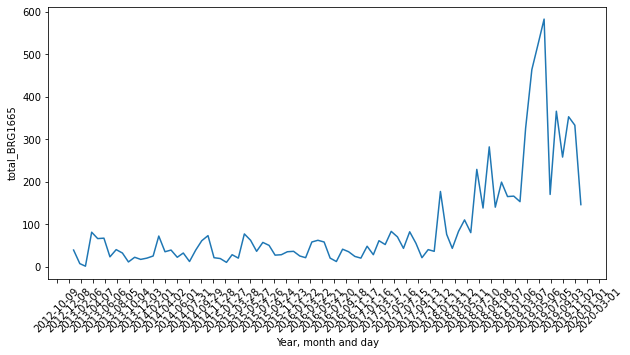

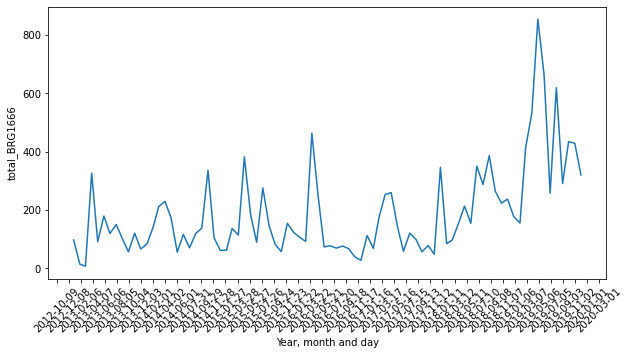

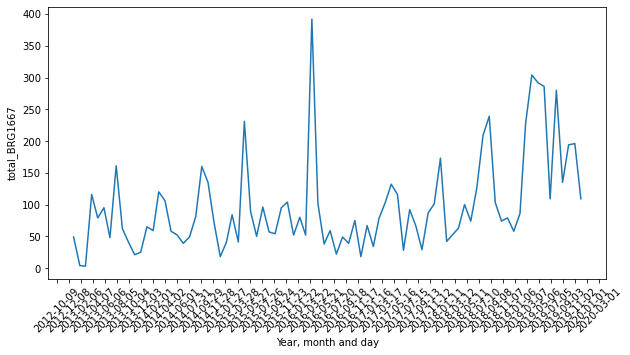

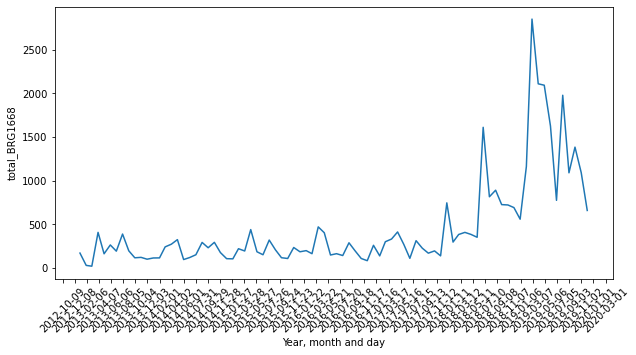

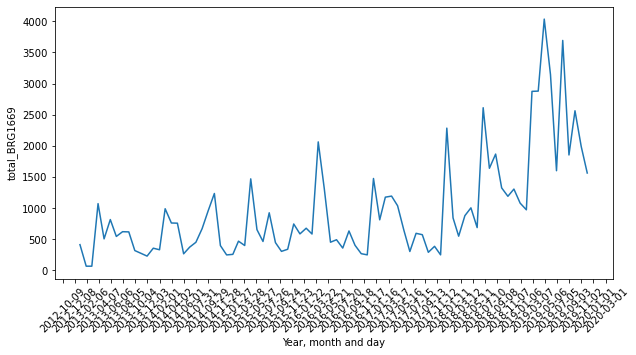

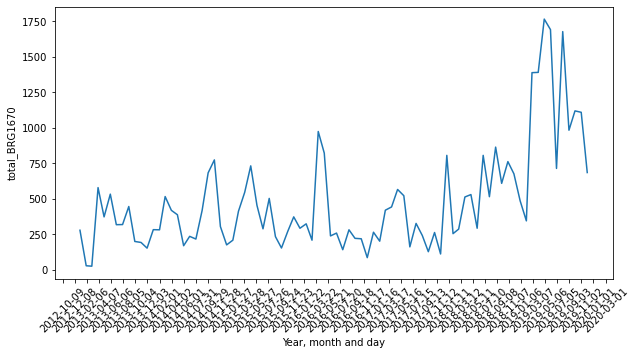

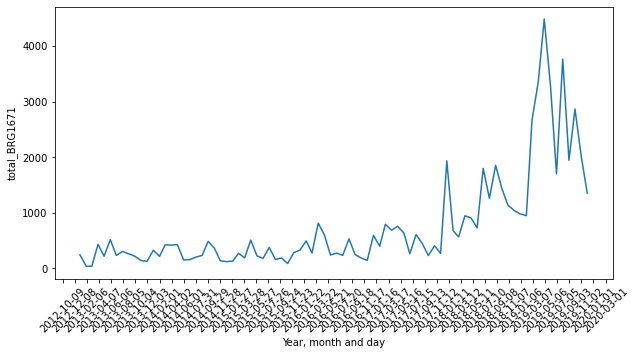

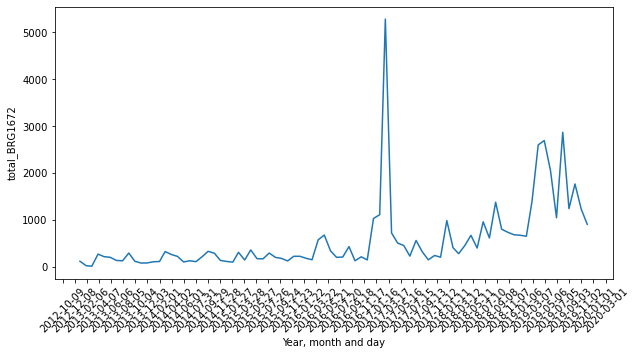

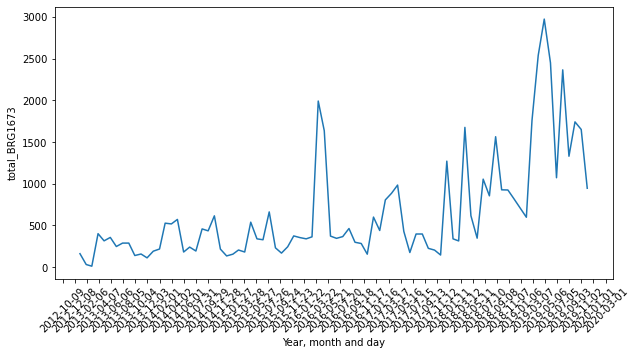

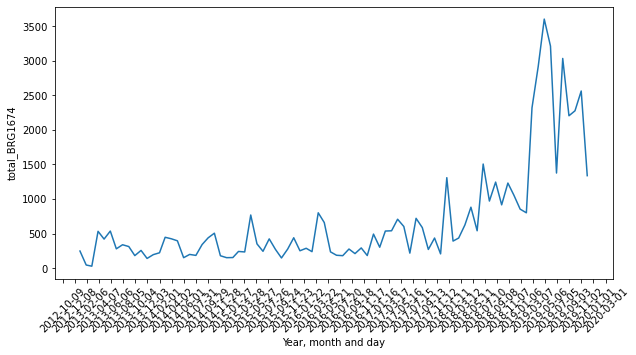

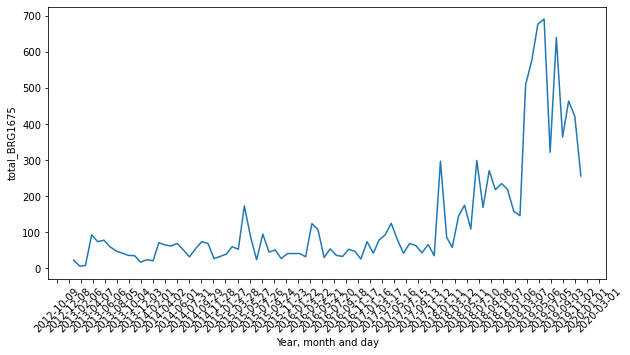

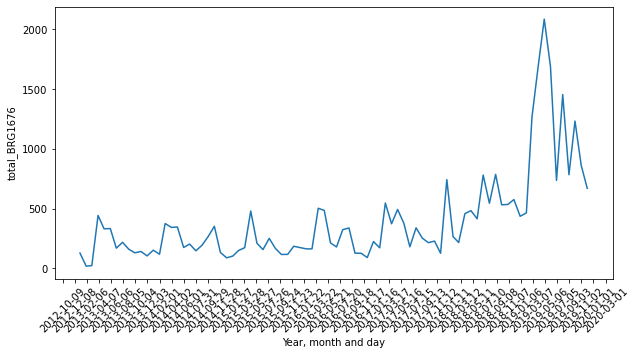

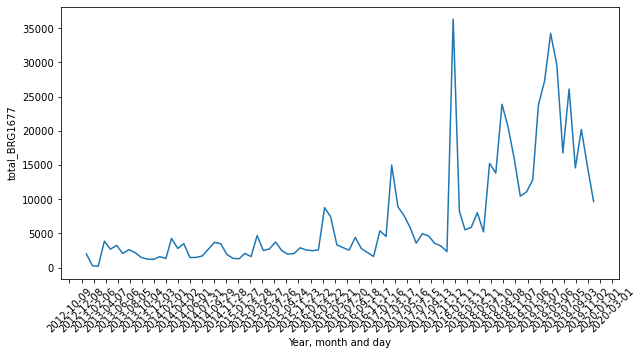

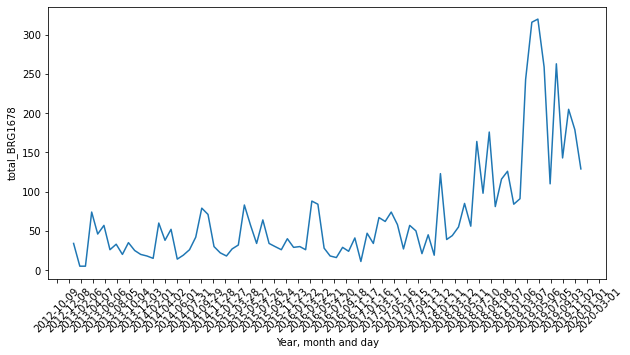

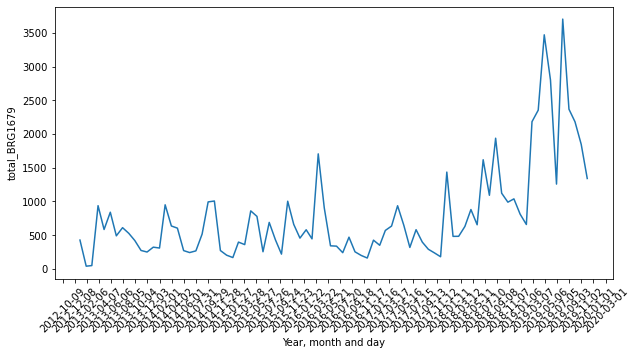

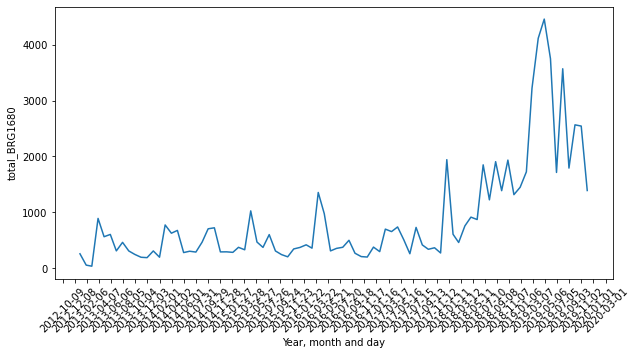

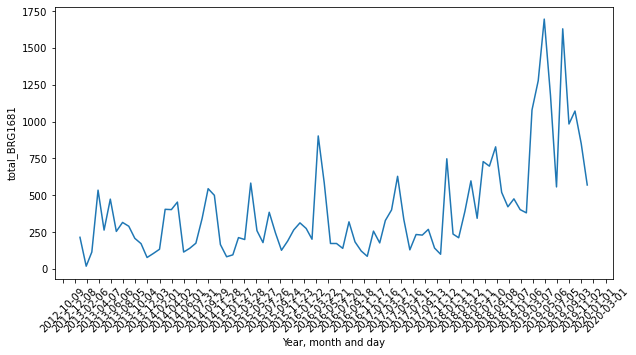

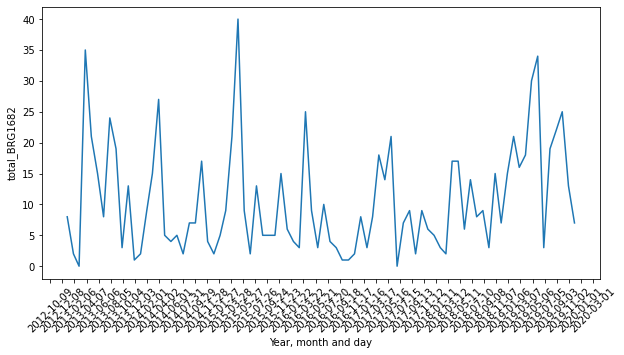

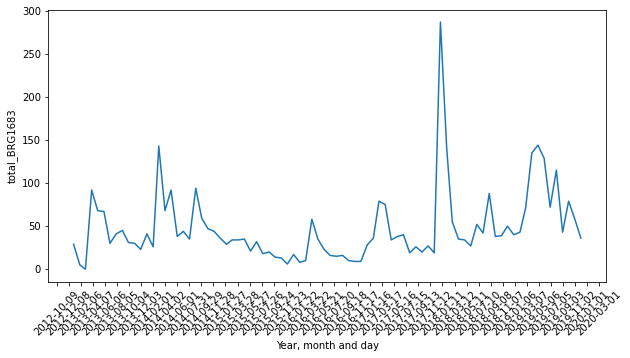

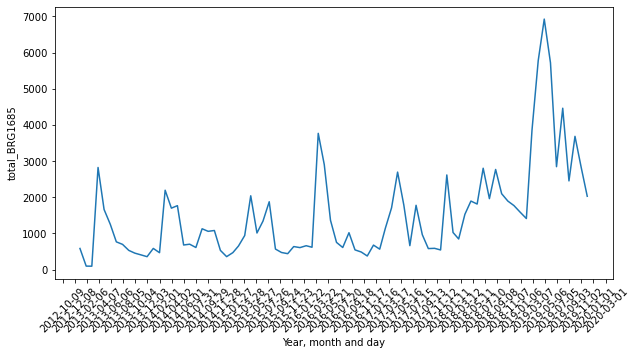

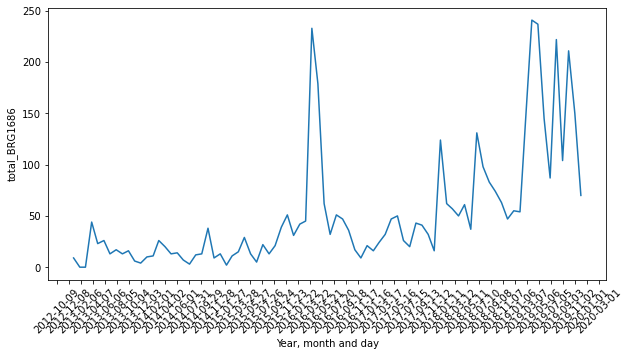

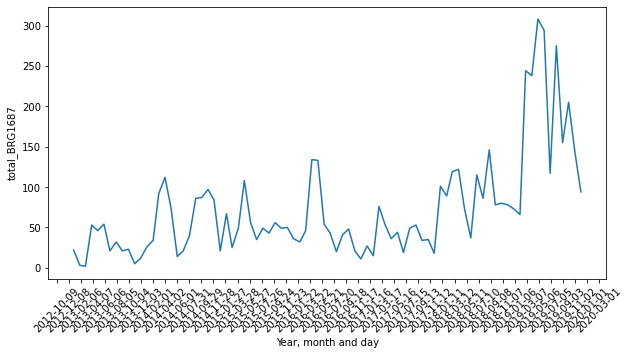

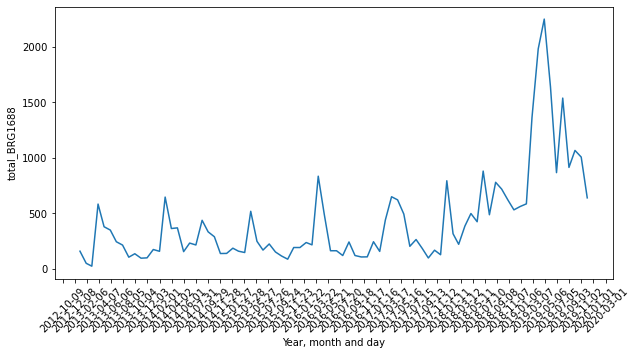

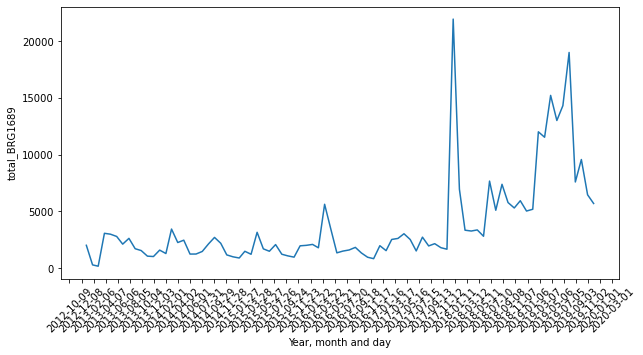

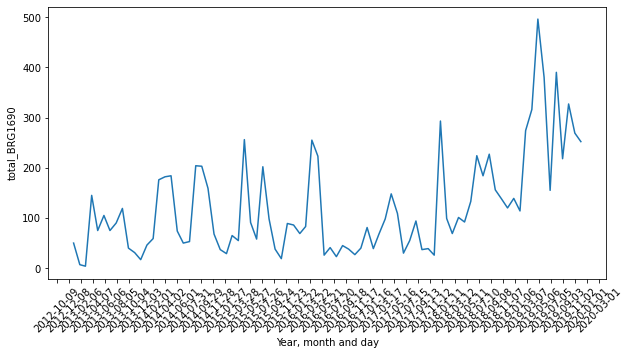

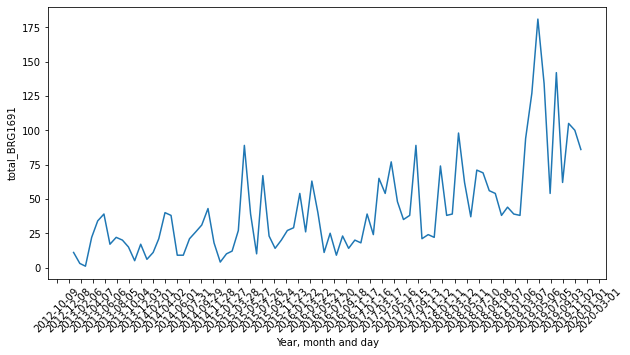

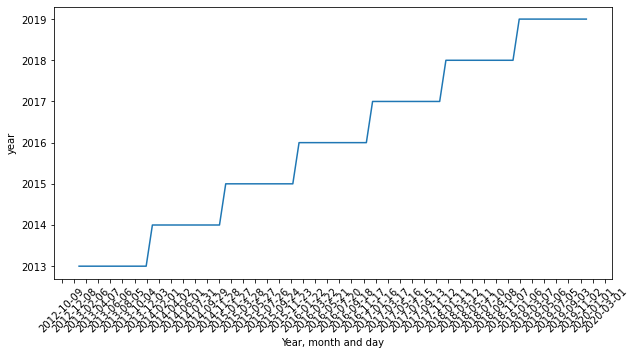

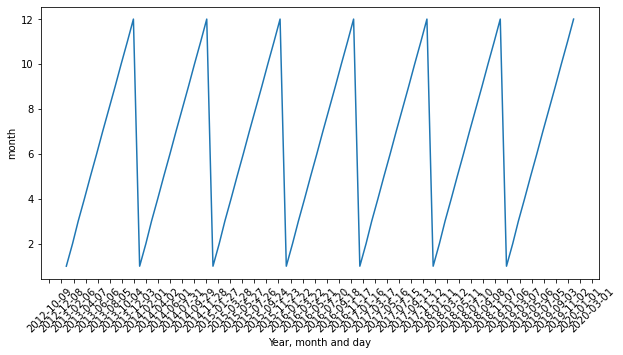

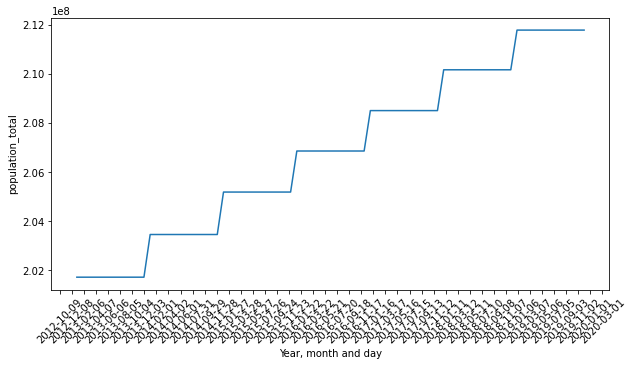

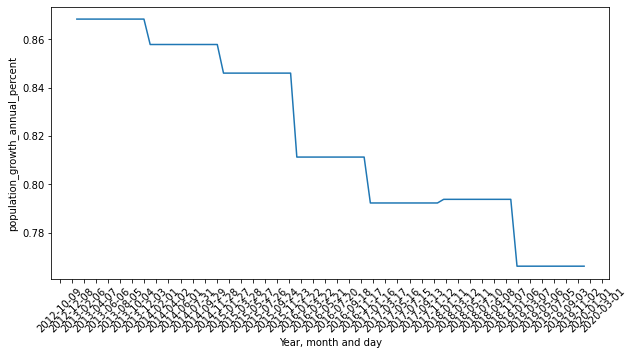

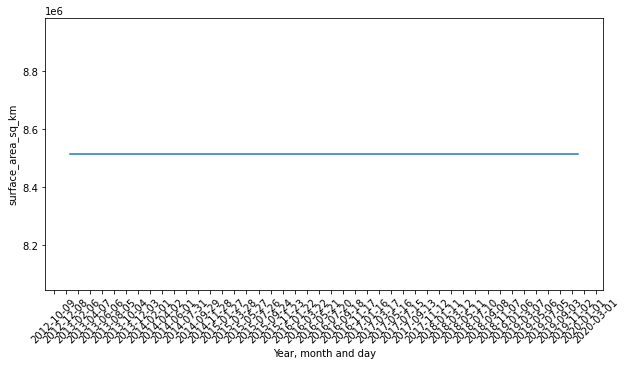

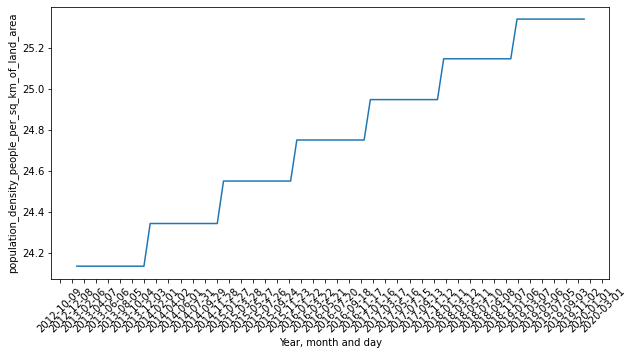

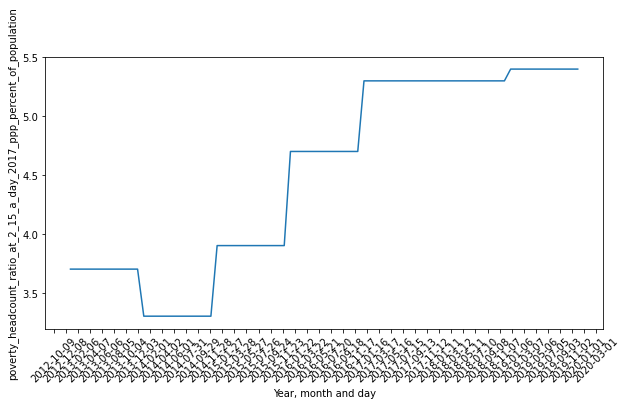

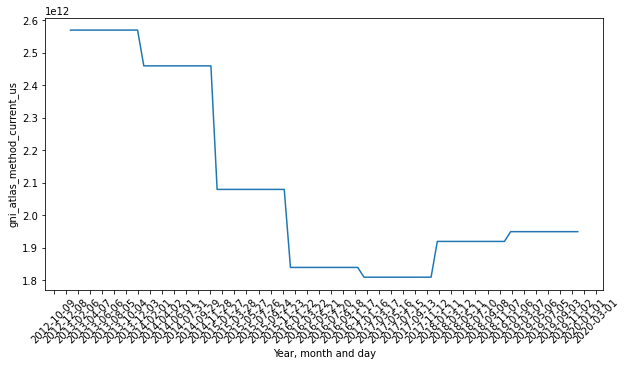

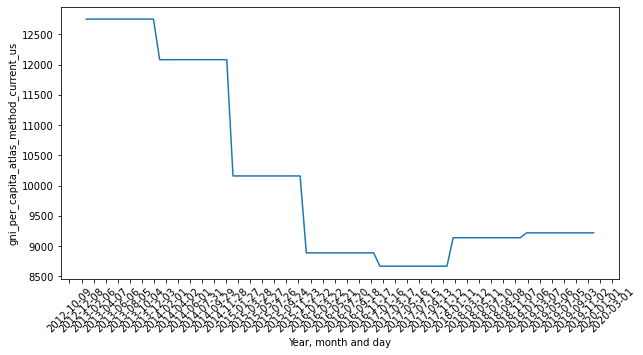

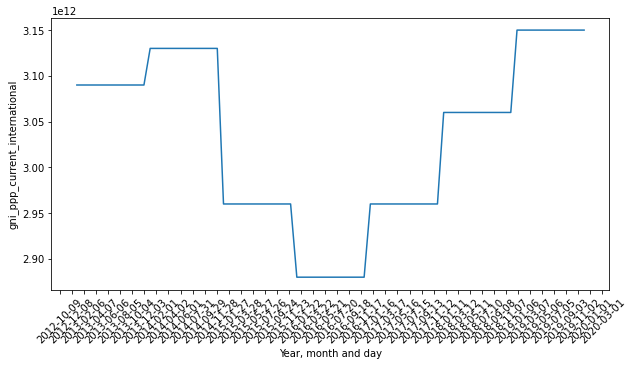

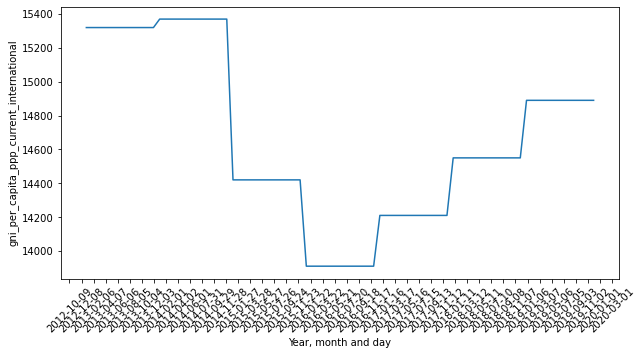

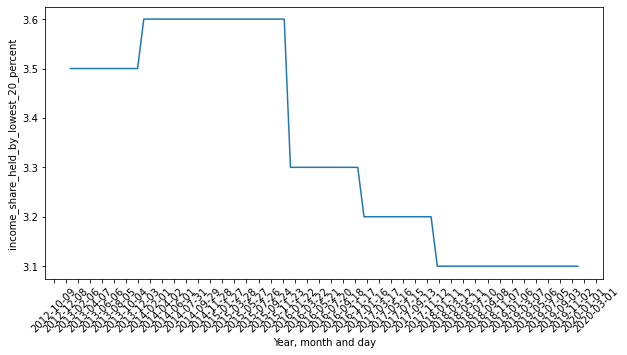

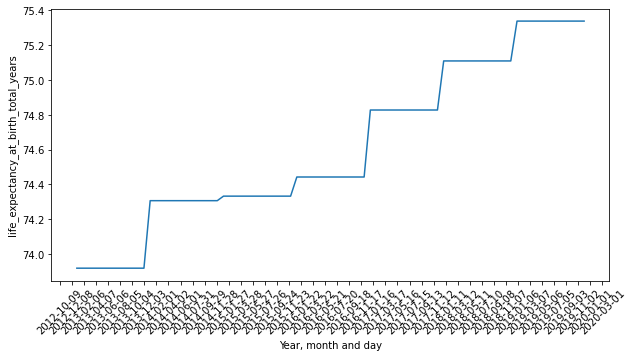

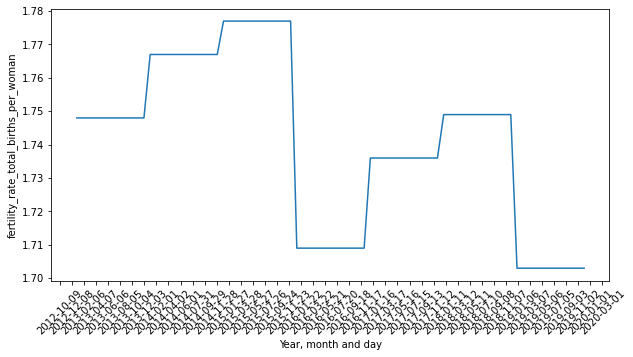

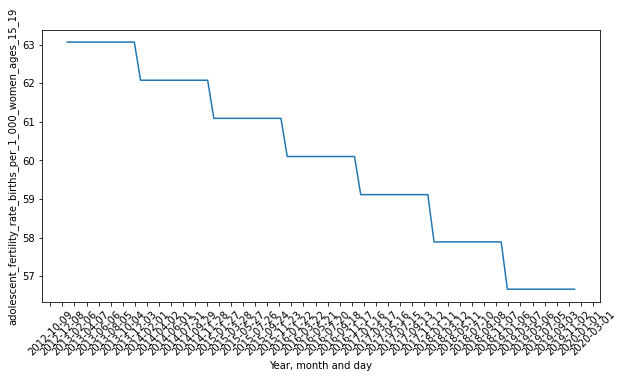

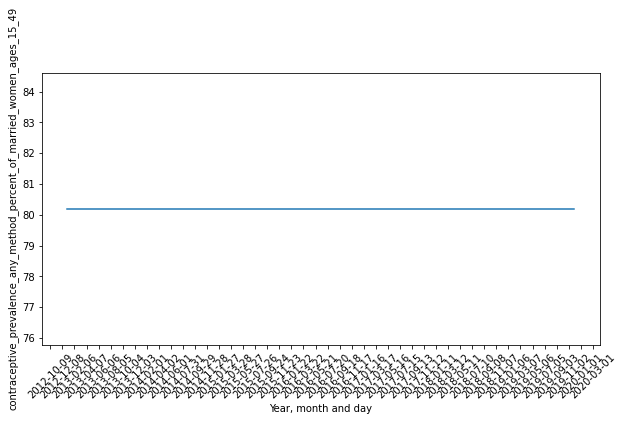

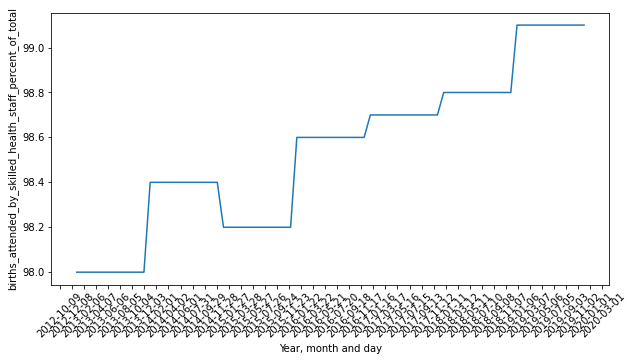

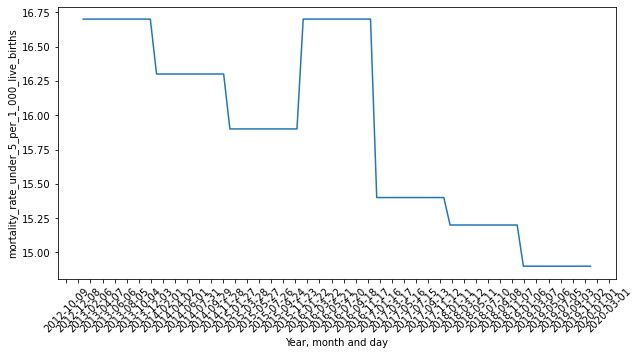

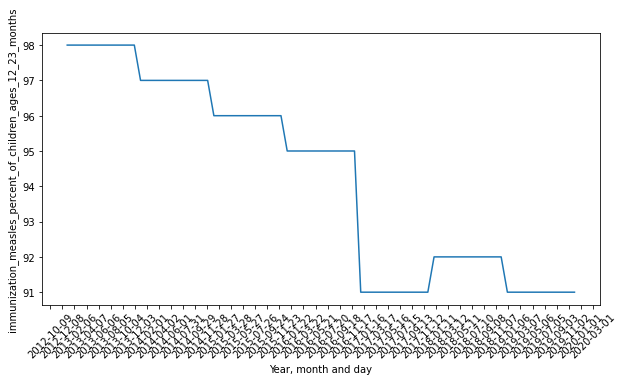

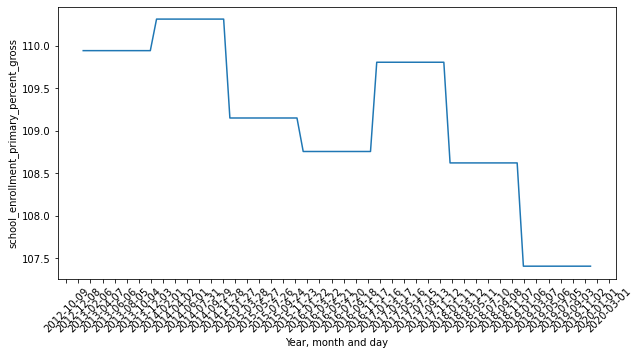

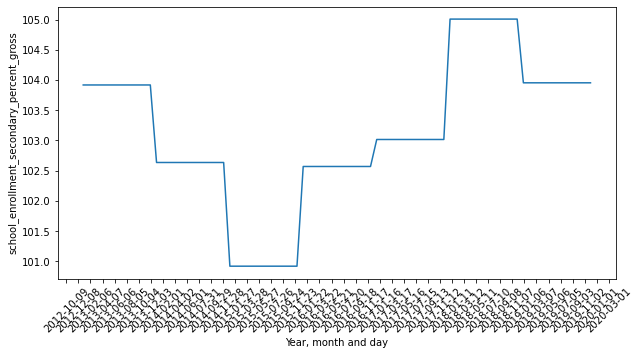

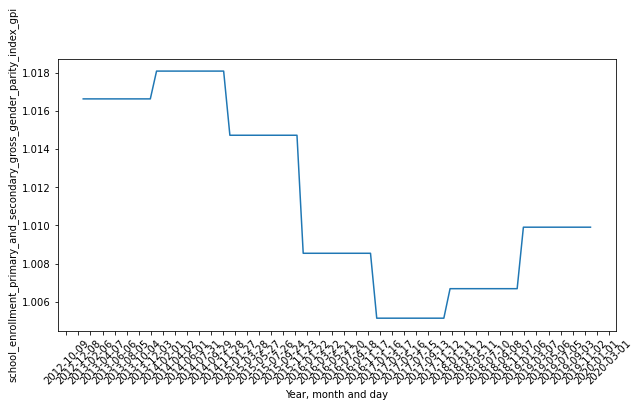

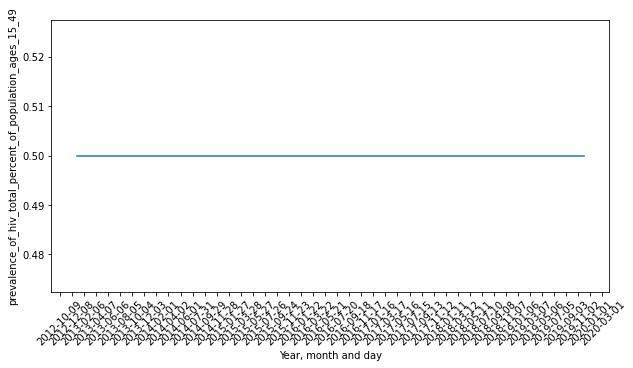

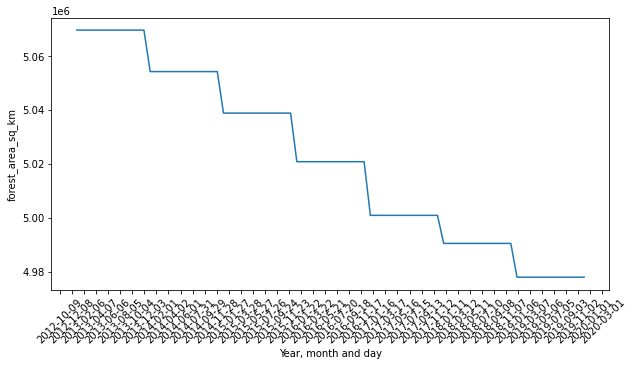

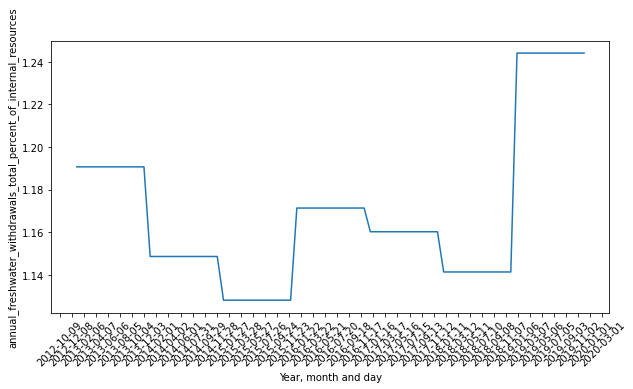

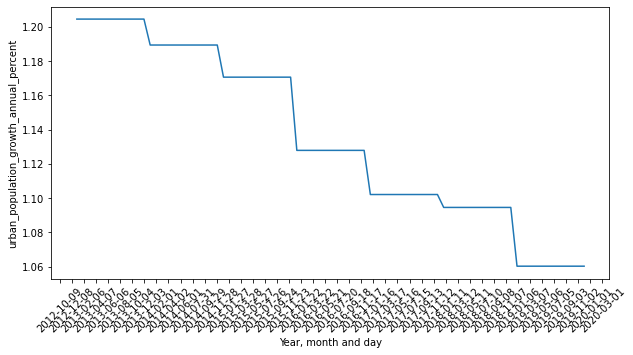

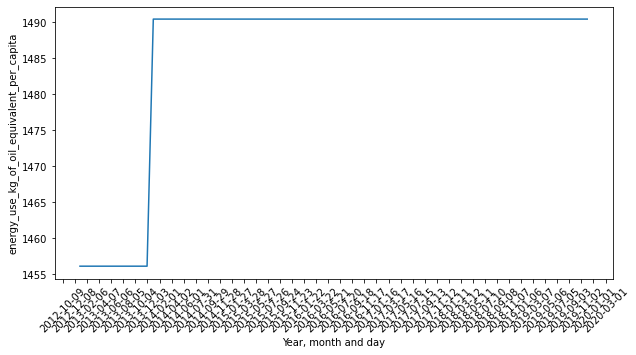

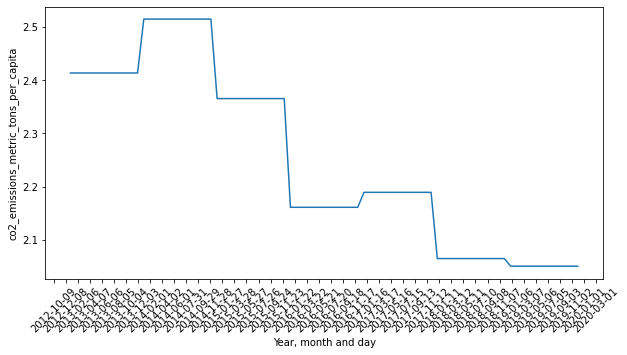

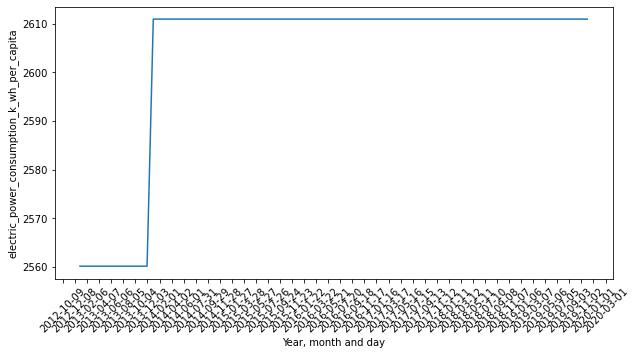

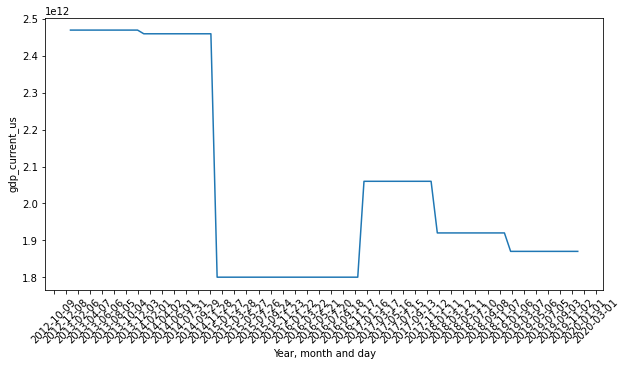

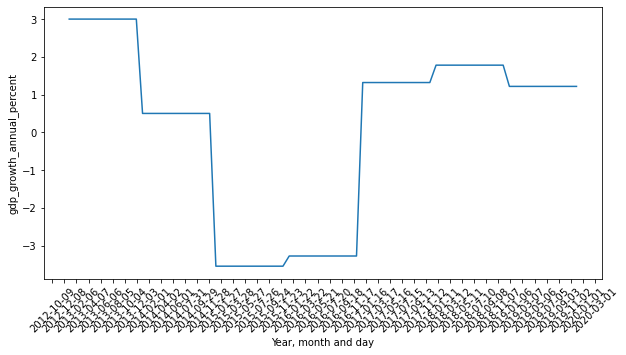

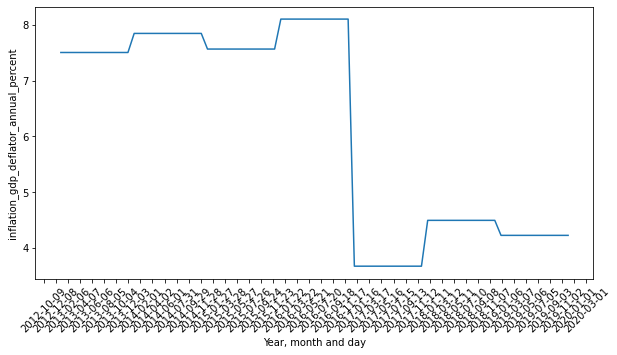

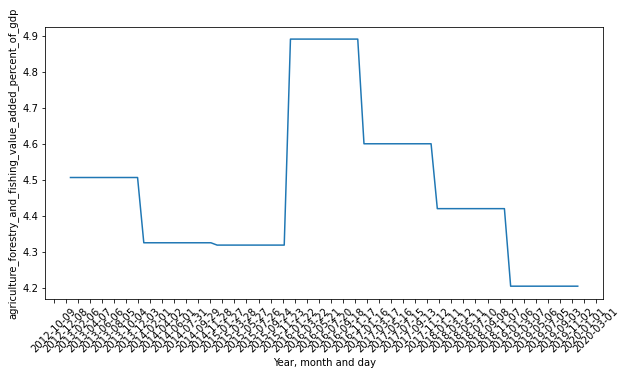

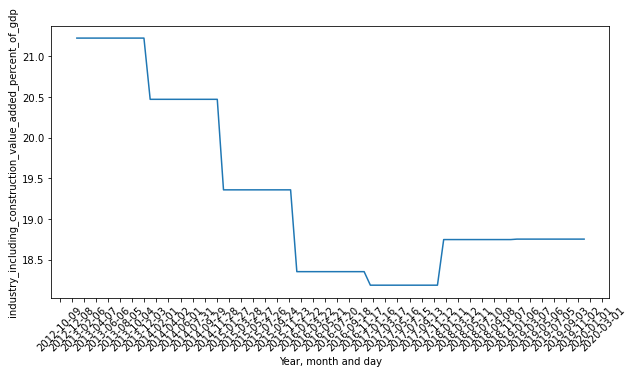

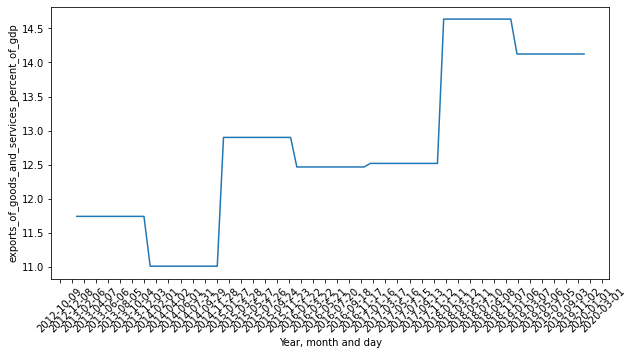

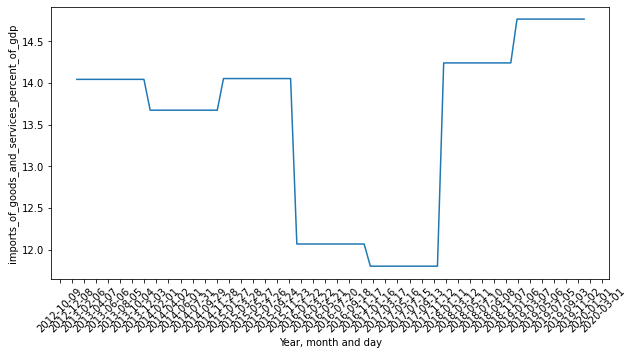

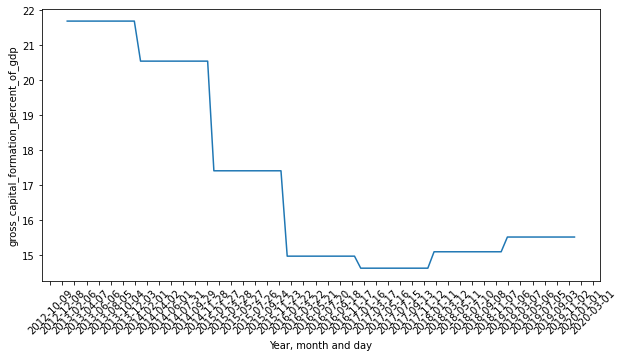

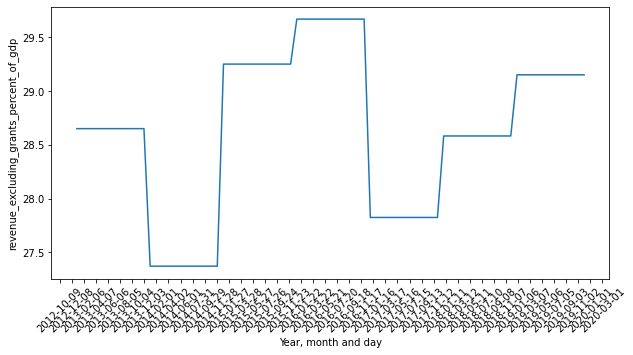

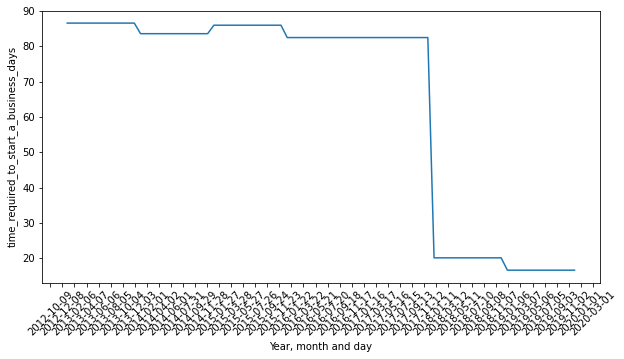

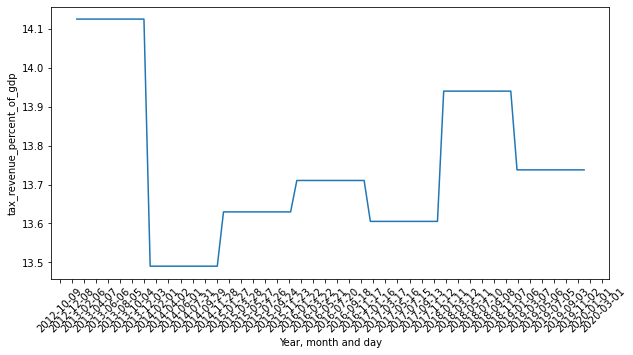

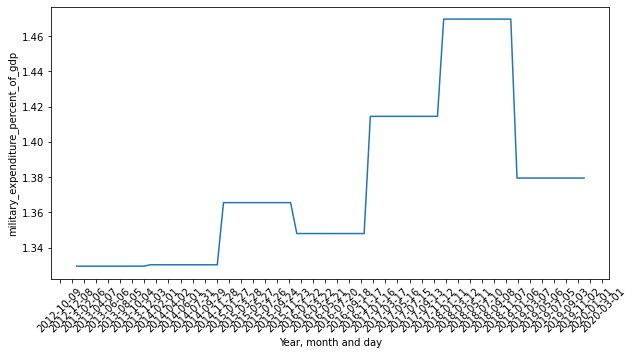

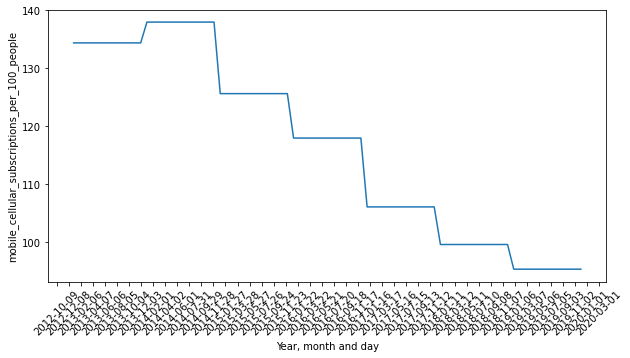

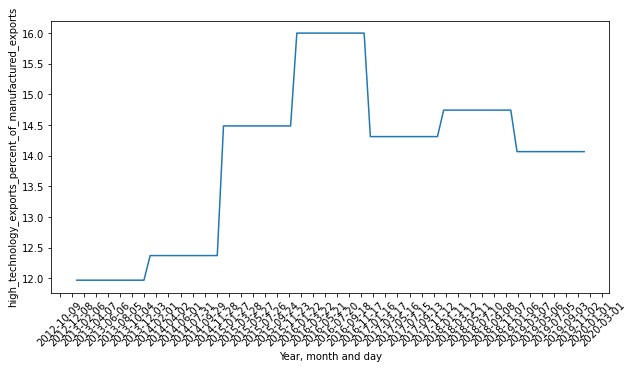

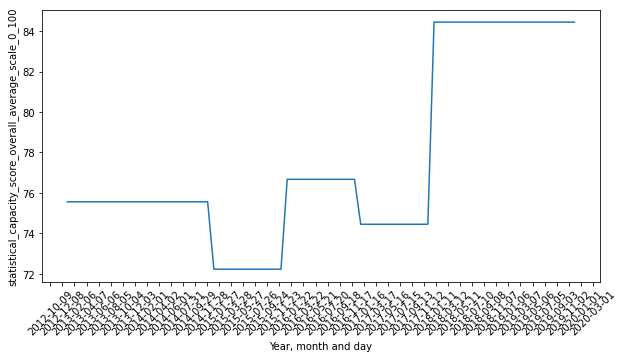

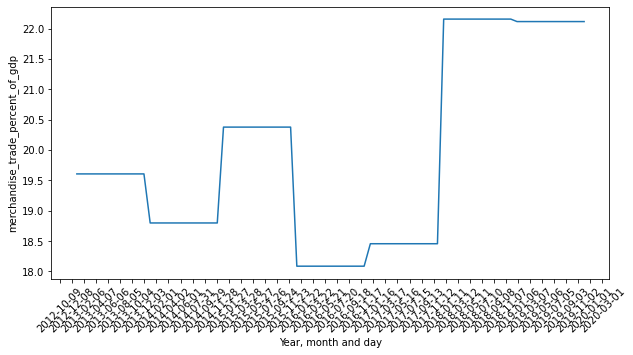

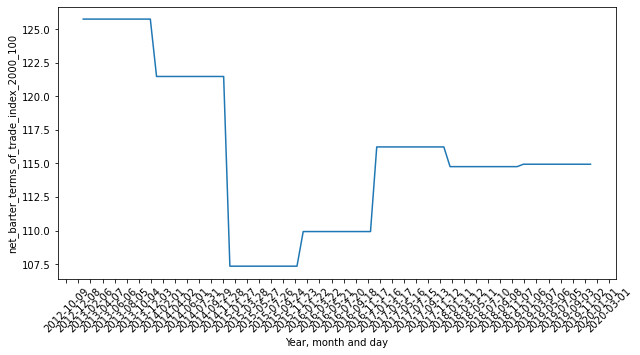

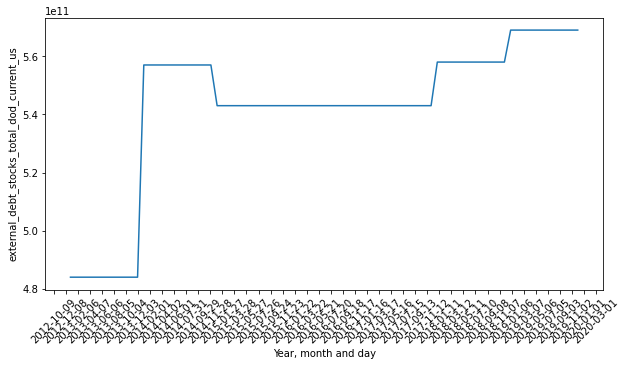

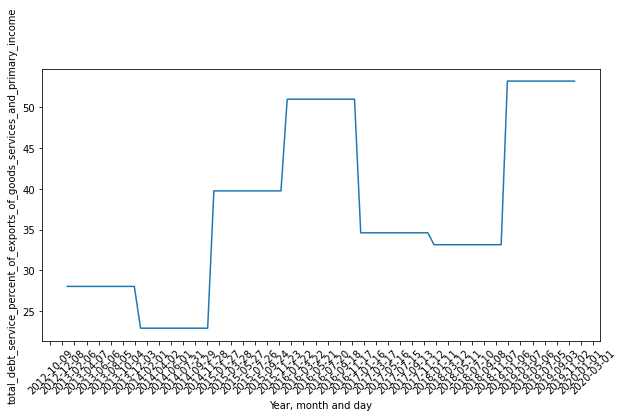

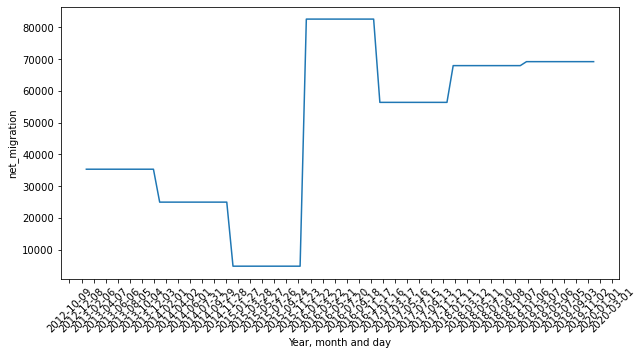

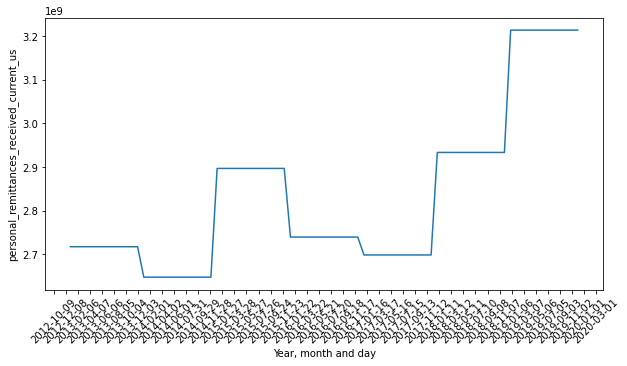

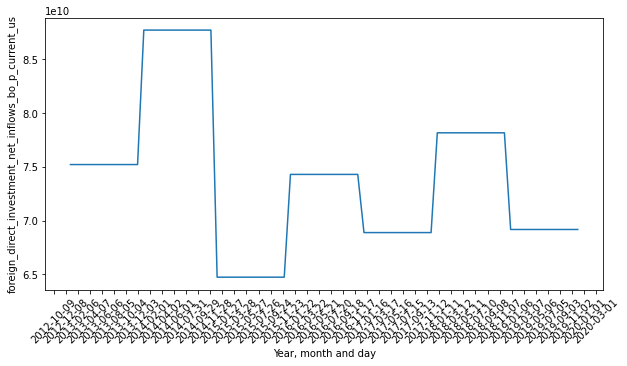

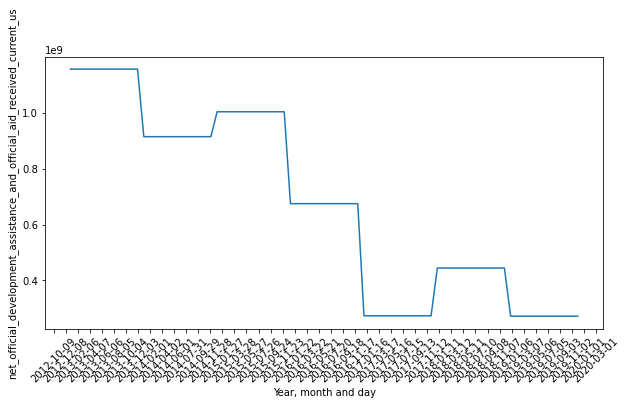

In [5]:
# Line chart of each numerical variable
columns_numeric = df_twitter.select_dtypes(include = [np.number]).columns
plt.rcParams["figure.figsize"]=10,5
for col in columns_numeric:
    plt.plot(df_twitter['Date'], df_twitter[col])
    plt.xlabel('Year, month and day')
    plt.xticks(rotation = 45)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 60))
    plt.ylabel(col)
    plt.show()

### b) Vaccine uptake

In [6]:
df_dtp = pd.read_csv("../data/uptake_br_dtp_2013_2019_clean.csv",
                    parse_dates = [0])
df_dtp.head()

Date  BRG1665  BRG1666  BRG1667  BRG1668  BRG1669  BRG1670  BRG1671  \
0 2013-01-01   313.73   246.14   301.36   292.99   176.35   223.46   245.94   
1 2013-01-02   308.32   244.60   294.97   288.02   175.39   221.84   240.54   
2 2013-01-03   303.17   243.20   288.91   283.29   174.49   220.31   235.38   
3 2013-01-04   298.28   241.89   283.14   278.81   173.66   218.85   230.45   
4 2013-01-05   293.63   240.68   277.67   274.56   172.90   217.47   225.73   

   BRG1672  BRG1673  BRG1674  BRG1675  BRG1676  BRG1677  BRG1678  BRG1679  \
0   212.98   216.19   256.99   176.86   253.74   198.41   240.51   226.06   
1   210.47   213.24   254.87   174.55   250.61   197.06   237.41   224.37   
2   208.07   210.42   252.90   172.35   247.62   195.79   234.47   222.77   
3   205.78   207.74   251.09   170.26   244.74   194.59   231.70   221.26   
4   203.59   205.20   249.43   168.27   241.97   193.47   229.10   219.82   

   BRG1680  BRG1681  BRG1682  BRG1683  BRG1684  BRG1685  BRG1686  BRG1687  \
0   229.59   197.48   223.64   185.12   192.50   163.84   297.36   358.76   
1   227.84   196.01   222.90   184.08   190.55   163.21   293.90   352.36   
2   226.18   194.59   222.25   183.09   188.69   162.62   290.63   346.28   
3   224.58   193.24   221.69   182.15   186.91   162.06   287.53   340.51   
4   223.03   191.96   221.20   181.24   185.20   161.54   284.58   335.03   

   BRG1688  BRG1689  BRG1690  BRG1691  Total  year year_month  
0   208.43   201.88   226.54   265.26 418.80  2013    2013-01  
1   205.56   200.18   224.10   261.94 415.22  2013    2013-01  
2   202.78   198.55   221.76   258.79 411.80  2013    2013-01  
3   200.10   196.98   219.53   255.79 408.54  2013    2013-01  
4   197.51   195.47   217.38   252.94 405.43  2013    2013-01

In [7]:
df_dtp.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2556 non-null   datetime64[ns]
 1   BRG1665     2556 non-null   float64       
 2   BRG1666     2556 non-null   float64       
 3   BRG1667     2556 non-null   float64       
 4   BRG1668     2556 non-null   float64       
 5   BRG1669     2556 non-null   float64       
 6   BRG1670     2556 non-null   float64       
 7   BRG1671     2556 non-null   float64       
 8   BRG1672     2556 non-null   float64       
 9   BRG1673     2556 non-null   float64       
 10  BRG1674     2556 non-null   float64       
 11  BRG1675     2556 non-null   float64       
 12  BRG1676     2556 non-null   float64       
 13  BRG1677     2556 non-null   float64       
 14  BRG1678     2556 non-null   float64       
 15  BRG1679     2556 non-null   float64       
 16  BRG1680     2556 non-nul

In [8]:
df_dtp_total = df_dtp[['Date', 'Total']]
df_dtp_total.head()

Date  Total
0 2013-01-01 418.80
1 2013-01-02 415.22
2 2013-01-03 411.80
3 2013-01-04 408.54
4 2013-01-05 405.43

In [9]:
df_dtp_total.describe()

Total
count 2556.00
mean   366.69
std    160.21
min     34.56
25%    292.71
50%    340.09
75%    396.62
max   1139.47

# 2. Data split for ML

In [10]:
df = df_twitter.join(df_dtp[['Total']]).replace(np.nan, 0)
df.head()

sentiment_BR  total_BR  sentiment_BRG1665  sentiment_BRG1666  \
0         -0.11      7753              -0.03              -0.01   
1         -0.14      1099               0.00              -0.14   
2         -0.11       930               0.00               0.00   
3         -0.13     17898              -0.06              -0.03   
4         -0.19     12278              -0.14              -0.07   

   sentiment_BRG1667  sentiment_BRG1668  sentiment_BRG1669  sentiment_BRG1670  \
0              -0.06              -0.12              -0.09              -0.06   
1               0.00              -0.07              -0.09              -0.17   
2               0.00              -0.05              -0.09              -0.07   
3              -0.07              -0.10              -0.07              -0.06   
4              -0.11              -0.08              -0.13              -0.09   

   sentiment_BRG1671  sentiment_BRG1672  sentiment_BRG1673  sentiment_BRG1674  \
0              -0.02              -0.15              -0.08              -0.09   
1              -0.03              -0.05              -0.10               0.00   
2              -0.06              -0.09               0.00               0.00   
3              -0.11              -0.12              -0.08              -0.08   
4              -0.13              -0.18              -0.15              -0.15   

   sentiment_BRG1675  sentiment_BRG1676  sentiment_BRG1677  sentiment_BRG1678  \
0               0.00              -0.09              -0.11              -0.09   
1              -0.17              -0.12              -0.15               0.20   
2              -0.12              -0.23              -0.11               0.00   
3              -0.12              -0.11              -0.10              -0.14   
4              -0.08              -0.11              -0.17              -0.22   

   sentiment_BRG1679  sentiment_BRG1680  sentiment_BRG1681  sentiment_BRG1682  \
0              -0.04              -0.14              -0.04               0.00   
1              -0.07              -0.11              -0.11               0.00   
2              -0.06              -0.18              -0.01               0.00   
3              -0.06              -0.15              -0.06               0.00   
4              -0.09              -0.24              -0.08              -0.05   

   sentiment_BRG1683  sentiment_BRG1685  sentiment_BRG1686  sentiment_BRG1687  \
0              -0.14              -0.08               0.00              -0.23   
1              -0.40              -0.12               0.00               0.00   
2               0.00              -0.22               0.00               0.00   
3              -0.15              -0.23              -0.02              -0.04   
4              -0.21              -0.26               0.00              -0.15   

   sentiment_BRG1688  sentiment_BRG1689  sentiment_BRG1690  sentiment_BRG1691  \
0              -0.13              -0.16              -0.04              -0.27   
1              -0.24              -0.22               0.00               0.00   
2              -0.04              -0.16               0.00               0.00   
3              -0.16              -0.17              -0.03              -0.05   
4              -0.20              -0.27              -0.03              -0.06   

   total_BRG1665  total_BRG1666  total_BRG1667  total_BRG1668  total_BRG1669  \
0             39             97             49            170            412   
1              7             14              4             29             66   
2              1              7              3             20             66   
3             81            326            116            407           1071   
4             66             91             79            162            505   

   total_BRG1670  total_BRG1671  total_BRG1672  total_BRG1673  total_BRG1674  \
0            280            240            116            161            247   
1             30             36      

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Columns: 108 entries, sentiment_BR to Total
dtypes: datetime64[ns, UTC](1), float64(64), int64(43)
memory usage: 71.0 KB


In [12]:
# Get indexes for CV
splits = 7
train_prop = 6
valid_prop = 4
test_prop = 2

cv = [([0,1,2,3,4,5],[6,7,8,9]), #10,11
     ([12,13,14,15,16,17],[18,19,20,21]), #22,23
     ([24,25,26,26,27,28],[29,30,31,32]), #33,34,35
     ([36,37,38,39,40,41],[42,43,44,45]), #46,47
     ([48,49,50,51,52,53],[54,55,56,57]), #58,59
     ([60,61,62,63,64,65],[66,67,68,69]), #70,71
     ([72,73,74,75,76,77],[78,79,80,81]) #82,83
     ]

cv

[([0, 1, 2, 3, 4, 5], [6, 7, 8, 9]),
 ([12, 13, 14, 15, 16, 17], [18, 19, 20, 21]),
 ([24, 25, 26, 26, 27, 28], [29, 30, 31, 32]),
 ([36, 37, 38, 39, 40, 41], [42, 43, 44, 45]),
 ([48, 49, 50, 51, 52, 53], [54, 55, 56, 57]),
 ([60, 61, 62, 63, 64, 65], [66, 67, 68, 69]),
 ([72, 73, 74, 75, 76, 77], [78, 79, 80, 81])]

In [13]:
df['Date']

0    2013-01-01 00:00:00+00:00
1    2013-02-01 00:00:00+00:00
2    2013-03-01 00:00:00+00:00
3    2013-04-01 00:00:00+00:00
4    2013-05-01 00:00:00+00:00
5    2013-06-01 00:00:00+00:00
6    2013-07-01 00:00:00+00:00
7    2013-08-01 00:00:00+00:00
8    2013-09-01 00:00:00+00:00
9    2013-10-01 00:00:00+00:00
10   2013-11-01 00:00:00+00:00
11   2013-12-01 00:00:00+00:00
12   2014-01-01 00:00:00+00:00
13   2014-02-01 00:00:00+00:00
14   2014-03-01 00:00:00+00:00
15   2014-04-01 00:00:00+00:00
16   2014-05-01 00:00:00+00:00
17   2014-06-01 00:00:00+00:00
18   2014-07-01 00:00:00+00:00
19   2014-08-01 00:00:00+00:00
20   2014-09-01 00:00:00+00:00
21   2014-10-01 00:00:00+00:00
22   2014-11-01 00:00:00+00:00
23   2014-12-01 00:00:00+00:00
24   2015-01-01 00:00:00+00:00
25   2015-02-01 00:00:00+00:00
26   2015-03-01 00:00:00+00:00
27   2015-04-01 00:00:00+00:00
28   2015-05-01 00:00:00+00:00
29   2015-06-01 00:00:00+00:00
30   2015-07-01 00:00:00+00:00
31   2015-08-01 00:00:00+00:00
32   201

In [14]:
# Split data
## Get indexes according to previous cv
train_valid_index = [0,1,2,3,4,5,6,7,8,9,12,13,14,15,16,17,
                     18,19,20,21,24,25,26,26,27,29,30,31,32,
                     33,36,37,38,39,40,41,42,43,44,45,48,49,
                     50,51,52,53,54,55,56,57,60,61,62,63,64,
                     65,66,67,68,69,72,73,74,75,76,77,78,79,
                     80,81]
test_index = [10,11,22,23,34,35,46,47,58,59,70,71,82,83]

## Split dataset
df_train_valid = df.drop(['Date'], axis = 1).loc[train_valid_index]
df_test = df.drop(['Date'], axis = 1).loc[test_index]

## Get X and y
X_train_valid = df_train_valid.drop(['Total'], axis = 1)
y_train_valid = df_train_valid['Total']
X_test = df_test.drop(['Total'], axis = 1)
y_test = df_test['Total']

## Print shape of datasets
print('Shape of training-valid X: ', X_train_valid.shape)
print('Shape of test X: ', X_test.shape)
print("")
print('Shape of training-valid Y: ', y_train_valid.shape)      
print('Shape of test Y: ', y_test.shape)

Shape of training-valid X:  (70, 106)
Shape of test X:  (14, 106)

Shape of training-valid Y:  (70,)
Shape of test Y:  (14,)


In [15]:
# Export datasets for ML
X_train_valid.to_csv('../data/x_train_valid.csv', index = False)
X_test.to_csv('../data/x_test.csv', index = False)

y_train_valid.to_csv('../data/y_train_valid.csv', index = False)
y_test.to_csv('../data/y_test.csv', index = False)

# 3. Machine learning

## 3.1. Ridge

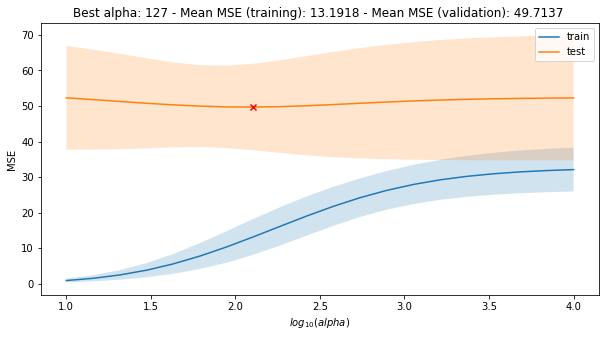

In [16]:
# Fit/test N models
gs_results = []
for i in range(6):
    X_tr = df.drop(['Date'], axis = 1).loc[cv[i][0]]
    X_vl = df.drop(['Date'], axis = 1).loc[cv[i][1]]
    y_tr = df['Total'].loc[cv[i][0]]
    y_vl = df['Total'].loc[cv[i][1]]
    
    # Standardize features
    scaler = StandardScaler()
    X_tr_rescaled = scaler.fit_transform(X_tr)
    X_vl_rescaled = scaler.transform(X_vl)

    # Grid search
    for alpha in np.logspace(1, 4, num=20):
        # Create and fit ridge regression
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_tr_rescaled, y_tr)

        # Save model and its performance on train/test sets
        gs_results.append({
            'alpha': alpha,
            'run_idx': i,
            'train_mse': mean_squared_error(y_tr, ridge.predict(X_tr_rescaled)),
            #'train_mae': mean_absolute_error(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
            'test_mse': mean_squared_error(y_vl, ridge.predict(X_vl_rescaled)),
            #'test_mae': mean_absolute_error(10**y_vl, 10**ridge.predict(X_vl_rescaled)),    
    
    })
        
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

# Group results by alpha value
gb_alpha = gs_results.groupby('alpha')

# Compute train/test mean scores with std
mean_tr = gb_alpha.train_mse.mean()
mean_te = gb_alpha.test_mse.mean()
std_tr = gb_alpha.train_mse.std()
std_te = gb_alpha.test_mse.std()
alphas = mean_tr.index.values

# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label='train')
plt.plot(np.log10(alphas), mean_te, label='test')

# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr-std_tr, mean_tr+std_tr, alpha=0.2)
plt.fill_between(np.log10(alphas), mean_te-std_te, mean_te+std_te, alpha=0.2)

# Add marker for best score
best_alpha = mean_te.idxmin()
plt.scatter(np.log10(best_alpha), mean_te.min(), marker='x', c='red', zorder=10)

# Print best MSE/MAE scores
best_result = gb_alpha.get_group(best_alpha)
plt.title('Best alpha: {:.0f} - Mean MSE (training): {:.4f} - Mean MSE (validation): {:.4f} '.format(
    best_alpha, best_result.train_mse.mean(), best_result.test_mse.mean()))

plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [17]:
best_result.head()

alpha  run_idx  train_mse  test_mse
7  127.43        0      12.50     49.55
27 127.43        1       9.60     41.59
47 127.43        2       8.29     69.29
67 127.43        3       9.87     55.82
87 127.43        4      19.12     48.11

In [18]:
# Fit the model with best alpha
def fit_model_best_n(X_train, y_train, X_test):
    # Create the model
    # Note: Using ridge with a small alpha to avoid ill-conditioning issues
    model = Ridge(alpha=best_result.alpha.iloc[0]) 
    
    # Fit it to train data
    model.fit(X_train, y_train)
    
    # Compute predictions for test set
    y_pred = np.maximum(
        model.predict(X_test),
        50 # set a lower limit
    )
    
    return y_pred

In [19]:
y_pred_all_best = fit_model_best_n(X_train_valid, y_train_valid, X_test)
mse_best = mean_squared_error(y_test, y_pred_all_best)

print('MSE: {:.2f}'.format(mse_best))


MSE: 52.91


## 3.2. K-nearest neighbours

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   neighbors  870 non-null    int64  
 1   leaf_size  870 non-null    int64  
 2   p          870 non-null    int64  
 3   run_idx    870 non-null    int64  
 4   train_mse  870 non-null    float64
 5   test_mse   870 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 40.9 KB
None
     neighbors  leaf_size  p  run_idx  train_mse  test_mse
0            1          1  1        0       0.00    154.08
1            1          2  1        0       0.00    154.08
2            1          3  1        0       0.00    154.08
3            1          4  1        0       0.00    154.08
4            1          5  1        0       0.00    154.08
29           2          1  1        0      12.31     49.37
30           2          2  1        0      12.31     49.37
31           2          3  1        0      12.31

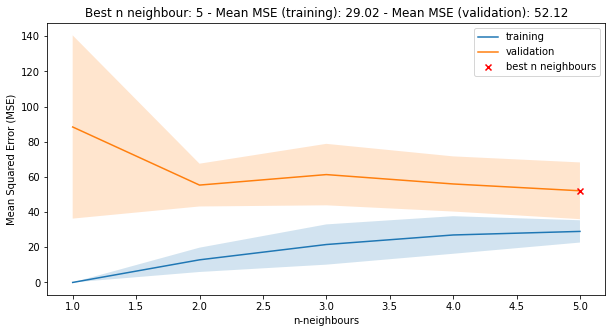

In [20]:
# Fit/test N models
gs_results = []
for i in range(6):
    X_tr = df.drop(['Date'], axis = 1).loc[cv[i][0]]
    X_vl = df.drop(['Date'], axis = 1).loc[cv[i][1]]
    y_tr = df['Total'].loc[cv[i][0]]
    y_vl = df['Total'].loc[cv[i][1]]
    
    # Standardize features
    scaler = StandardScaler()
    X_tr_rescaled = scaler.fit_transform(X_tr)
    X_vl_rescaled = scaler.transform(X_vl)

    # Grid search
    for n in list(range(1,6)):
        for l in list(range(1,30)):
            for p in list(range(1,2)):
                knn = KNeighborsRegressor(n_neighbors = n,
                                          leaf_size = l,
                                          p = p)
                knn.fit(X_tr_rescaled, y_tr)

                # Save model and its performance on train/test sets
                gs_results.append({
                    'neighbors': n,
                    'leaf_size': l,
                    'p': p,
                    'run_idx': i,
                    'train_mse': mean_squared_error(y_tr, knn.predict(X_tr_rescaled)),
                    #'train_mae': mean_absolute_error(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
                    'test_mse': mean_squared_error(y_vl, knn.predict(X_vl_rescaled)),
                    #'test_mae': mean_absolute_error(10**y_vl, 10**ridge.predict(X_vl_rescaled)),    
    
    })
        
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
print(gs_results.info())

# Group results by n value
gb_n = gs_results.groupby('neighbors')
print(gb_n.head())

# Compute train/test mean scores with std
mean_tr = gb_n.train_mse.mean()
mean_te = gb_n.test_mse.mean()
std_tr = gb_n.train_mse.std()
std_te = gb_n.test_mse.std()
ns = mean_tr.index.values

# Plot mean scores
plt.plot(ns, mean_tr, label='training')
plt.plot(ns, mean_te, label='validation')

# Quantify variance with ±std curves
plt.fill_between(ns, mean_tr-std_tr, mean_tr+std_tr, alpha=0.2)
plt.fill_between(ns, mean_te-std_te, mean_te+std_te, alpha=0.2)

# Add marker for best score
best_n = mean_te.idxmin()
plt.scatter(best_n, mean_te.min(), marker='x', c='red', zorder=10, label = "best n neighbours")

# Print best MSE/MAE scores
best_result = gb_n.get_group(n)
plt.title('Best n neighbour: {:.0f} - Mean MSE (training): {:.2f} - Mean MSE (validation): {:.2f}'.format(
    best_n, best_result.train_mse.mean(), best_result.test_mse.mean()))

plt.xlabel('n-neighbours')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

In [21]:
best_n

5

In [22]:
# Fit the model with best alpha
def fit_model_best_n(X_train, y_train, X_test):
    # Create the model
    # Note: Using ridge with a small alpha to avoid ill-conditioning issues
    model = KNeighborsRegressor(n_neighbors = best_result.neighbors.iloc[0],
                                leaf_size = best_result.leaf_size.iloc[0],
                                p = best_result.p.iloc[0]) 
    
    # Fit it to train data
    model.fit(X_train, y_train)
    
    # Compute predictions for test set
    y_pred = np.maximum(
        model.predict(X_test),
        50 # set a lower limit
    )
    
    return y_pred

In [23]:
y_pred_all_best = fit_model_best_n(X_train_valid, y_train_valid, X_test)
mse_best = mean_squared_error(y_test, y_pred_all_best)

print('MSE: {:.2f}'.format(mse_best))


MSE: 57.45


## 3.2. Select best k features

In [24]:
# Reduction of features based on K best features
X_all = df.drop(['Date'], axis = 1).drop(['Total'], axis = 1)
y_all = df['Total']

print("\33[1m" + "\33[34m" + 
     "\nReduction of features based on k best features" +
     "\33[0m" + "\n")
select_10 = SelectKBest(f_regression, k = 10)
select_10.fit(X_all, y_all)
X_all_10 = select_10.transform(X_all)
print("Shape after selecting best 10 features:", X_all_10.shape) 

select_18 = SelectKBest(f_regression, k = 18)
select_18.fit(X_all, y_all)
X_all_18 = select_18.transform(X_all)
print("Shape after selecting best 15 features:", X_all_18.shape) 

select_30 = SelectKBest(f_regression, k = 30)
select_30.fit(X_all, y_all)
X_all_30 = select_30.transform(X_all)
print("Shape after selecting best 30 features:", X_all_30.shape) 


Reduction of features based on k best features

Shape after selecting best 10 features: (84, 10)
Shape after selecting best 15 features: (84, 18)
Shape after selecting best 30 features: (84, 30)


In [25]:
# Getting selected features
features_10 = list(X_all.columns[select_10.get_support(indices = True)])
print('\33[1m'+'\nBest 10 features: \n' +
      '\33[0m', features_10)

features_18 = list(X_all.columns[select_18.get_support(indices = True)])
print('\33[1m'+'\nBest 18 features: \n' +
      '\33[0m', features_18)

features_30 = list(X_all.columns[select_30.get_support(indices = True)])
print('\33[1m'+'\nBest 30 features: \n' +
      '\33[0m', features_30)


Best 10 features: 
 ['year', 'population_total', 'population_growth_annual_percent', 'population_density_people_per_sq_km_of_land_area', 'life_expectancy_at_birth_total_years', 'adolescent_fertility_rate_births_per_1_000_women_ages_15_19', 'forest_area_sq_km', 'urban_population_growth_annual_percent', 'co2_emissions_metric_tons_per_capita', 'mobile_cellular_subscriptions_per_100_people']

Best 18 features: 
 ['year', 'population_total', 'population_growth_annual_percent', 'population_density_people_per_sq_km_of_land_area', 'poverty_headcount_ratio_at_2_15_a_day_2017_ppp_percent_of_population', 'income_share_held_by_lowest_20_percent', 'life_expectancy_at_birth_total_years', 'adolescent_fertility_rate_births_per_1_000_women_ages_15_19', 'births_attended_by_skilled_health_staff_percent_of_total', 'immunization_measles_percent_of_children_ages_12_23_months', 'school_enrollment_primary_percent_gross', 'forest_area_sq_km', 'urban_population_growth_annual_percent', 'co2_emissions_metric_ton